# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
#suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(SeuratData))
#suppressMessages(library(SeuratDisk))
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(plyr))




[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘scDblFinder’ was built under R version 4.3.2”
Warning message:
“package ‘SingleCellExperiment’ was built under R version 4.3.2”
Warning message:
“package ‘SummarizedExperiment’ was built under R version 4.3.2”
Warning message:
“package ‘MatrixGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘biovizBase’ was built 

# Read objects clustered after genotyping

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [3]:
adata<-readRDS(file="merged_clusters_after_genotyping.rds")


In [4]:
adata


An object of class Seurat 
442958 features across 16835 samples within 4 assays 
Active assay: ATAC (340606 features, 340606 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn, harmony.rna, harmony.atac

# Initial Graphs

## Wnn graphs 

## seurat_clusters

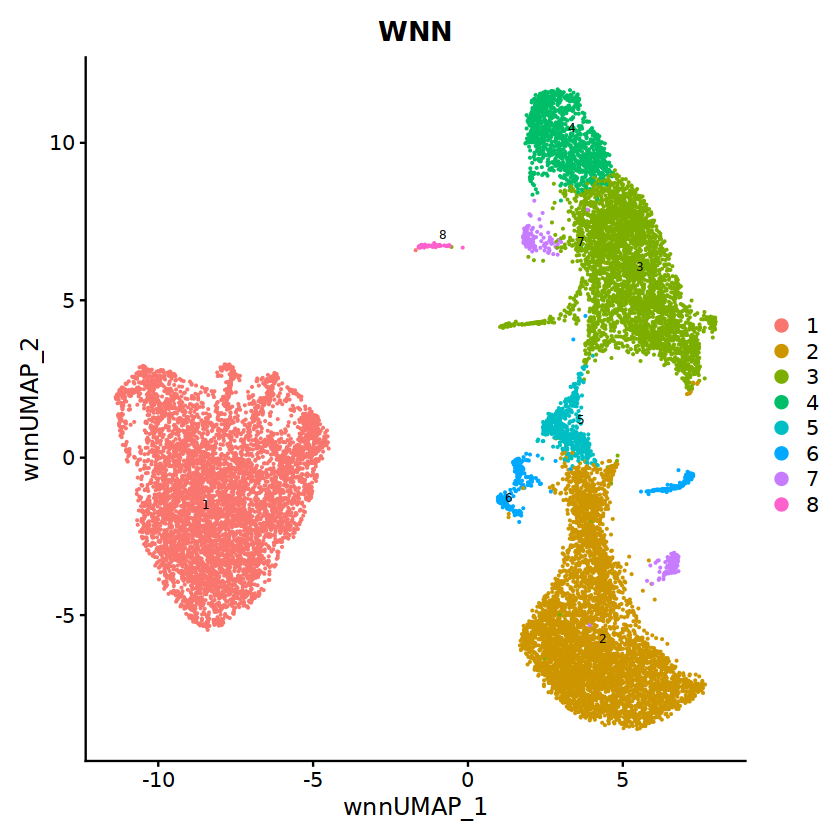

In [10]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3


In [8]:
names(adata)

[1] "RNA"          "RNA_raw"      "SCT"          "ATAC"         "wknn"        
 [6] "wsnn"         "SCT_nn"       "SCT_snn"      "pca"          "umap.rna"    
[11] "lsi"          "umap.atac"    "umap.wnn"     "harmony.rna"  "harmony.atac"

In [5]:
adata

An object of class Seurat 
442958 features across 16835 samples within 4 assays 
Active assay: ATAC (340606 features, 340606 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn, harmony.rna, harmony.atac

In [6]:
Graphs(adata)

[1] "wknn" "wsnn"

# Subcluster cluster 3

In [7]:
adata<-FindSubCluster(
  adata,
  3,
  'wsnn',
  subcluster.name = "Subclusters_3",
  resolution = 0.2,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3589
Number of edges: 117561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8775
Number of communities: 5
Elapsed time: 0 seconds


In [8]:
adata@meta.data$Subclusters_3<-as.factor(adata@meta.data$Subclusters_3)

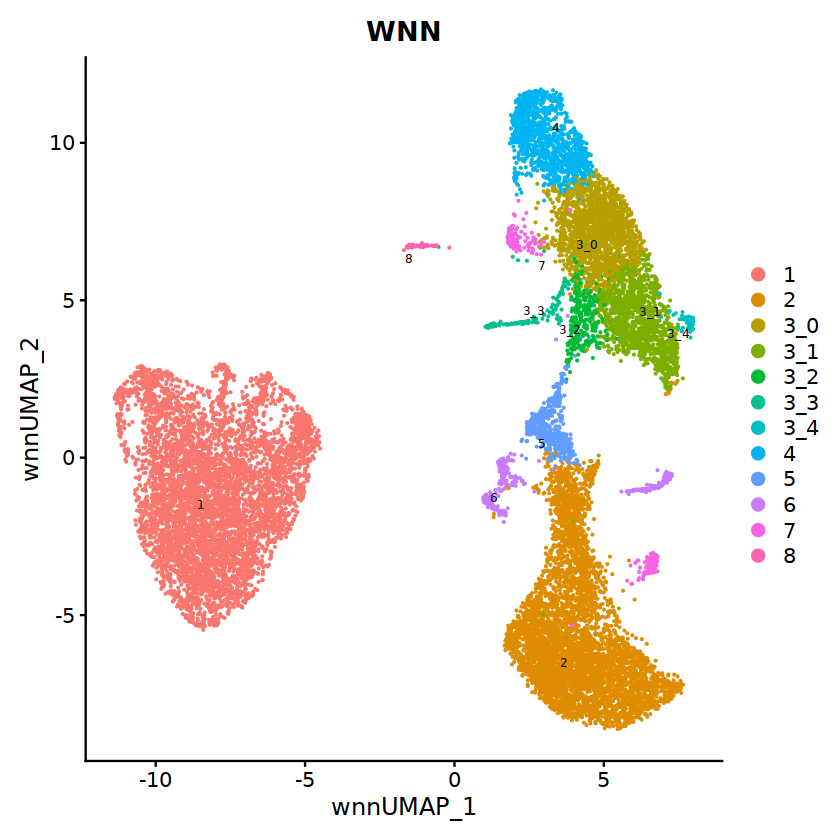

In [9]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "Subclusters_3", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3


In [12]:
markers<-c('SOX2','SOX4','POU5F1',"TBXT",'BMP4','MIXL1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14')

# DotPlot

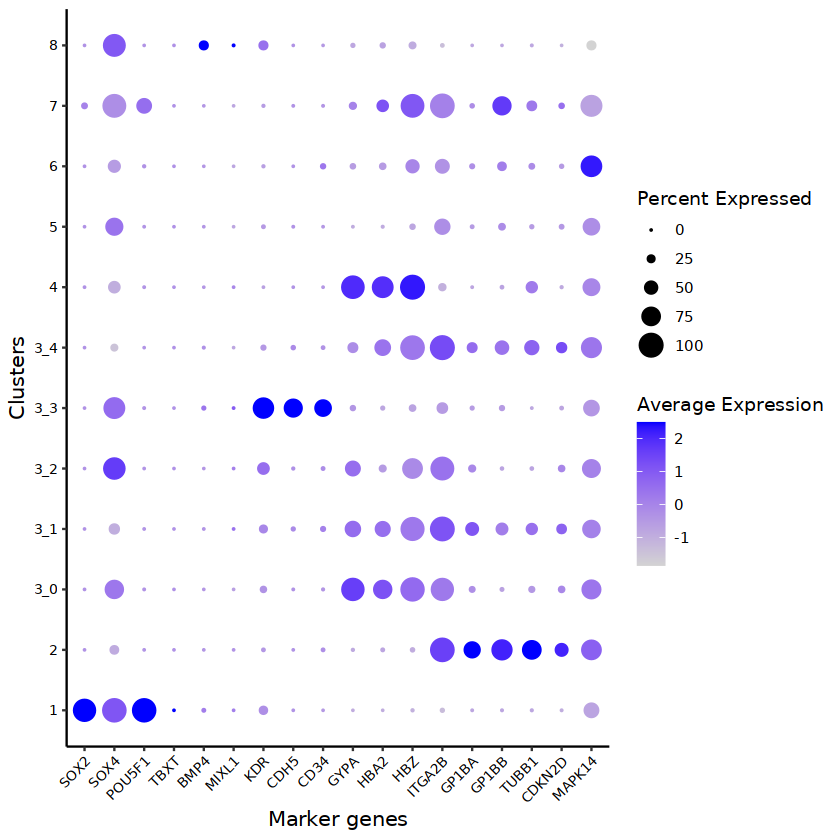

In [13]:
dotplot3<-DotPlot(
  adata,
    features=markers,
  assay = "SCT",
    group.by="Subclusters_3")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

# Subcluster cluster 4

In [14]:
adata<-FindSubCluster(
  adata,
  4,
  'wsnn',
  subcluster.name = "Subclusters_4",
  resolution = 1,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1173
Number of edges: 39959

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6253
Number of communities: 7
Elapsed time: 0 seconds


In [15]:
adata@meta.data$Subclusters_4<-as.factor(adata@meta.data$Subclusters_4)

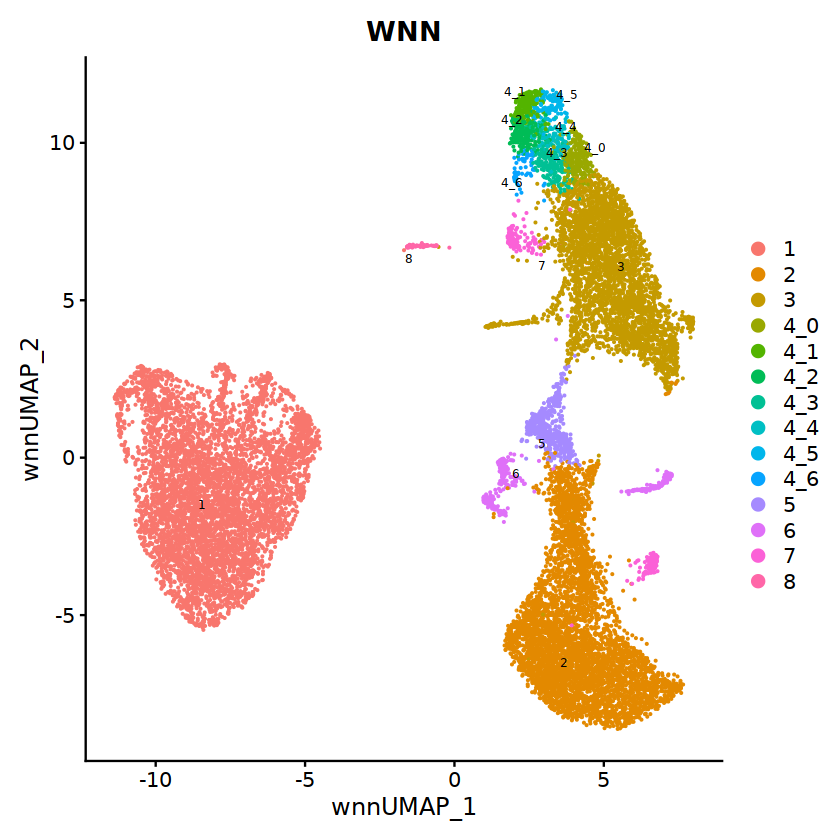

In [16]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "Subclusters_4", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3


# DotPlot

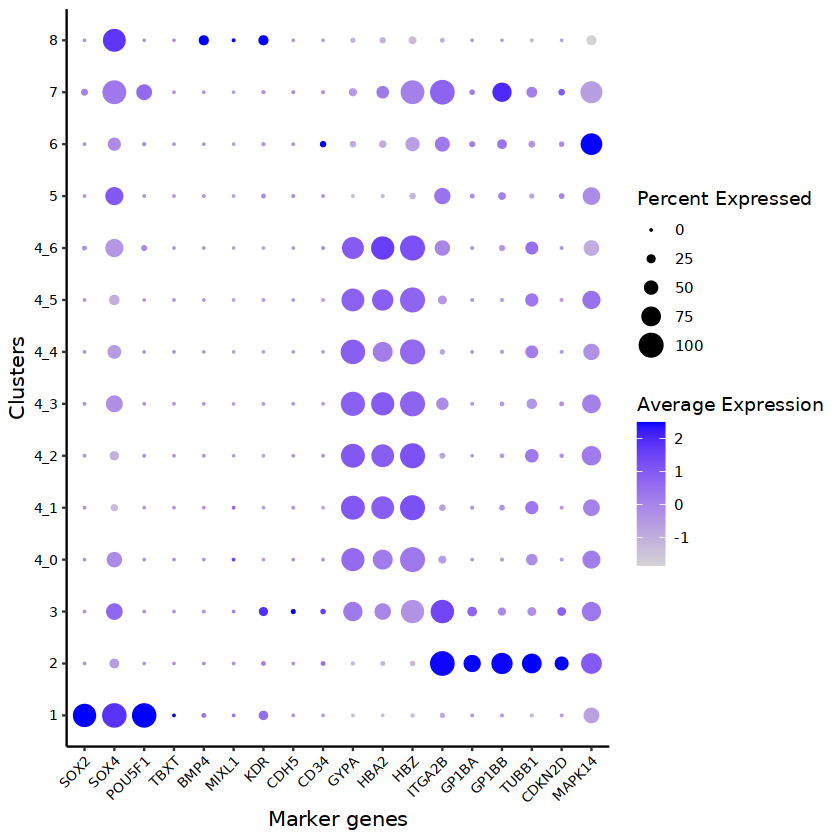

In [17]:
dotplot3<-DotPlot(
  adata,
    features=markers,
  assay = "SCT",
    group.by="Subclusters_4")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

# Subcluster cluster 7

In [18]:
adata<-FindSubCluster(
  adata,
  7,
  'wsnn',
  subcluster.name = "Subclusters_7",
  resolution = 2,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 274
Number of edges: 11372

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2402
Number of communities: 6
Elapsed time: 0 seconds


In [19]:
adata@meta.data$Subclusters_7<-as.factor(adata@meta.data$Subclusters_7)

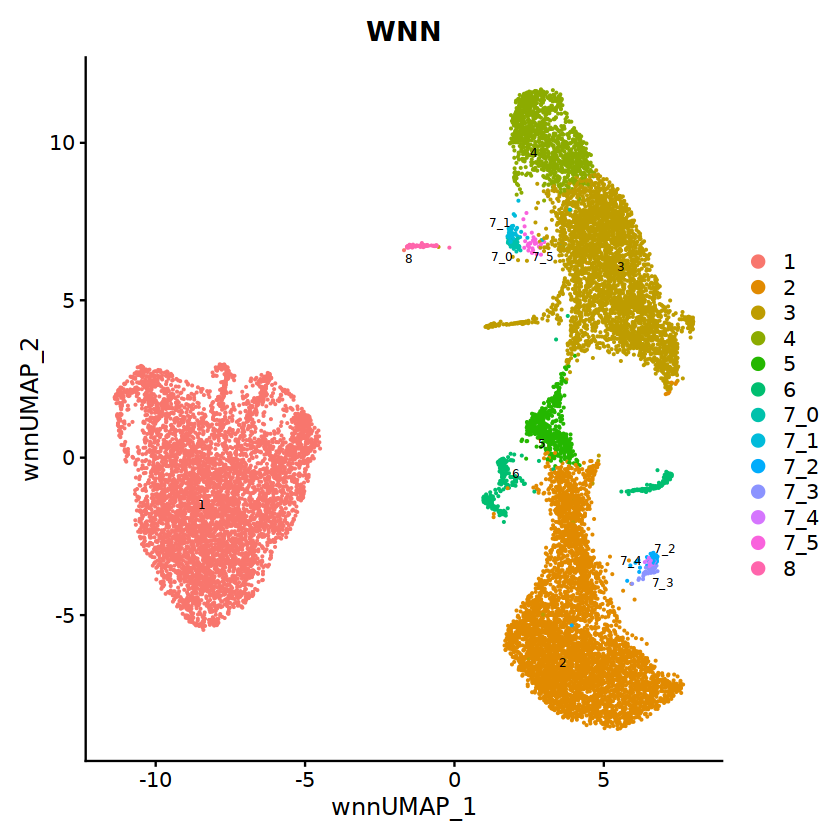

In [20]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "Subclusters_7", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3


# DotPlot

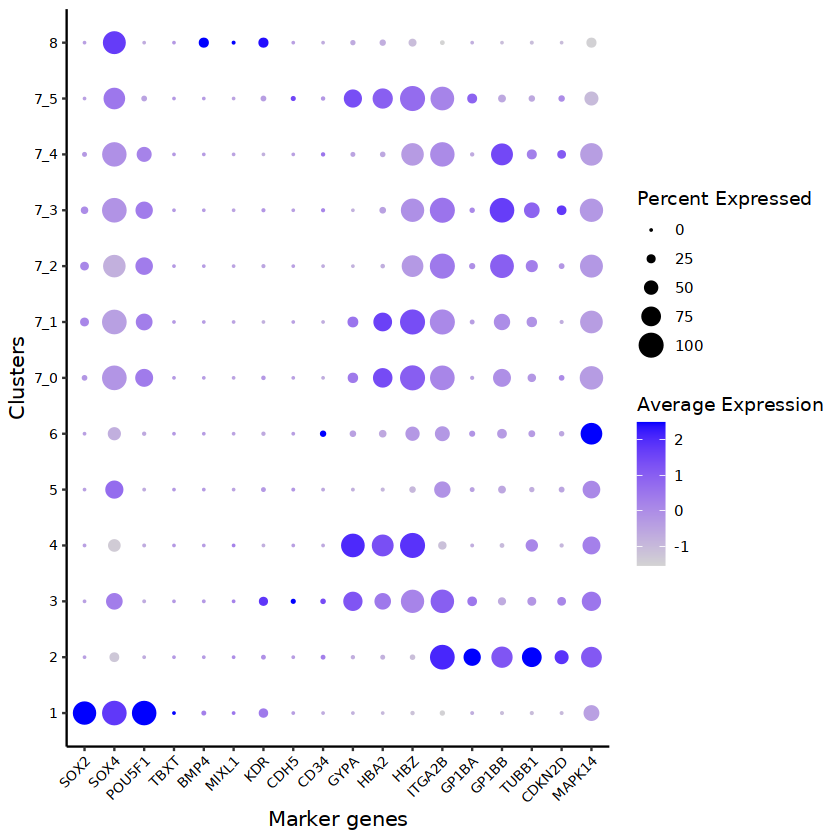

In [21]:
dotplot3<-DotPlot(
  adata,
    features=markers,
  assay = "SCT",
    group.by="Subclusters_7")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

# Subcluster cluster 2

In [22]:
adata<-FindSubCluster(
  adata,
  2,
  'wsnn',
  subcluster.name = "Subclusters_2",
  resolution = 0.5,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4936
Number of edges: 174356

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7834
Number of communities: 6
Elapsed time: 0 seconds


In [23]:
adata@meta.data$Subclusters_2<-as.factor(adata@meta.data$Subclusters_2)

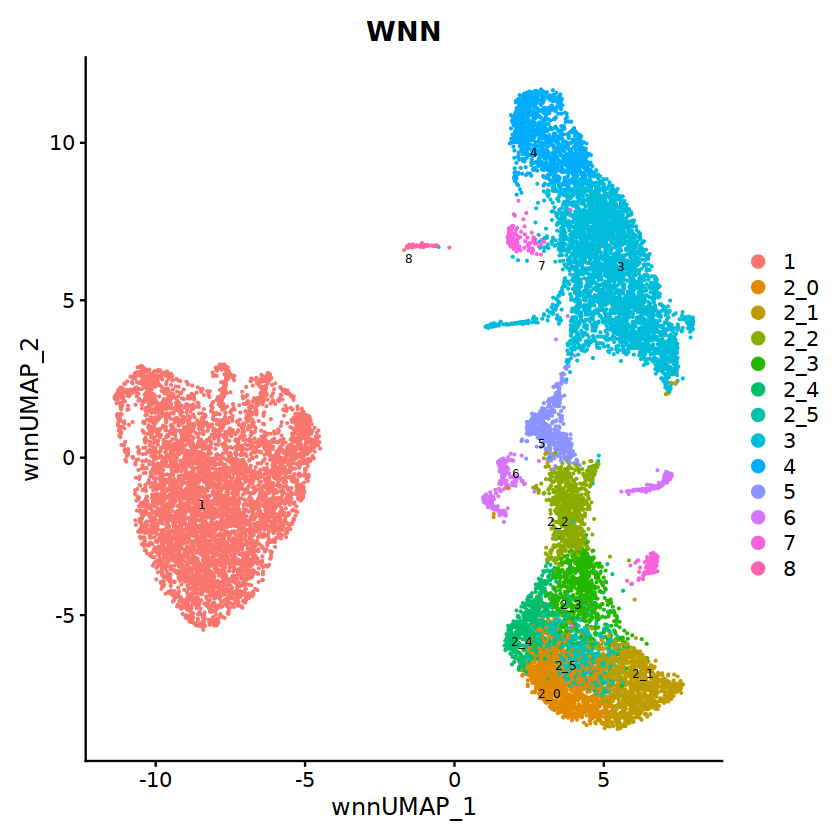

In [24]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "Subclusters_2", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3


# DotPlot

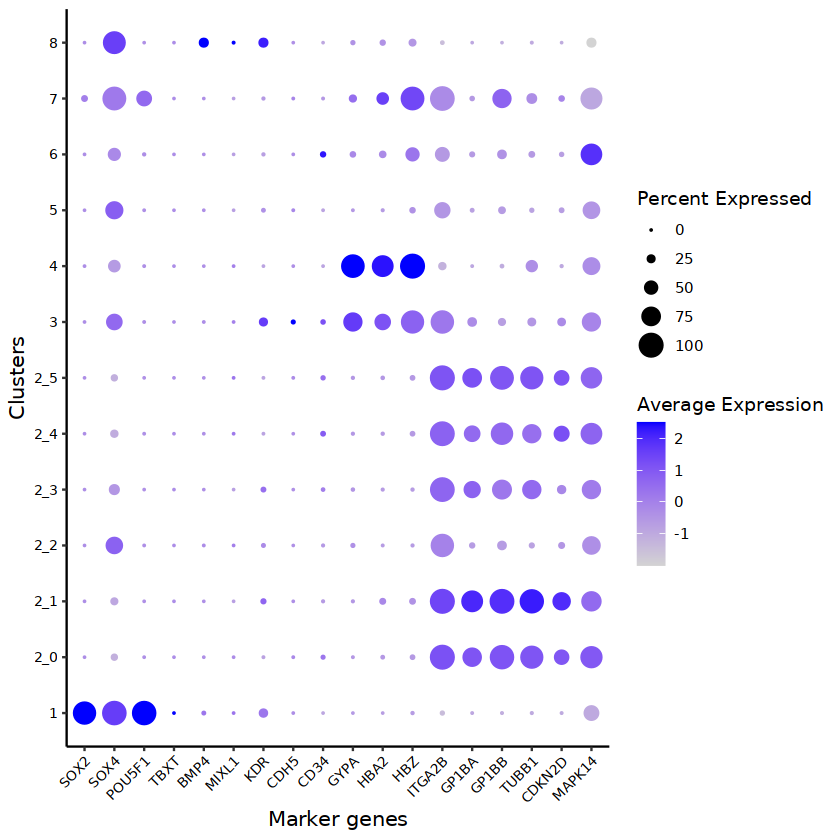

In [26]:
dotplot3<-DotPlot(
  adata,
    features=markers,
  assay = "SCT",
    group.by="Subclusters_2")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

# My own clusters

In [27]:
adata@meta.data$new_clusters<-NA

In [28]:
indx<-which(adata@meta.data$seurat_clusters%in%c('1','5','6','8'))

str(indx)

 int [1:6863] 1 2 3 4 5 6 7 8 9 10 ...


In [29]:
adata@meta.data$new_clusters[indx]<-as.character(adata@meta.data$seurat_clusters[indx])

In [30]:
indx<-which(adata@meta.data$seurat_clusters%in%c('3'))

str(indx)

 int [1:3589] 5853 5854 5855 5857 5858 5859 5860 5861 5862 5863 ...


In [31]:
adata@meta.data$new_clusters[indx]<-as.character(adata@meta.data$Subclusters_3[indx])

In [32]:
indx<-which(adata@meta.data$seurat_clusters%in%c('4'))

str(indx)

 int [1:1173] 6017 6045 6115 6120 6121 6122 6127 6128 6133 6147 ...


In [33]:
adata@meta.data$new_clusters[indx]<-as.character(adata@meta.data$Subclusters_4[indx])

In [34]:
indx<-which(adata@meta.data$seurat_clusters%in%c('7'))

str(indx)

 int [1:274] 5979 6135 6151 6204 6211 6213 6309 6334 6355 6498 ...


In [35]:
adata@meta.data$new_clusters[indx]<-as.character(adata@meta.data$Subclusters_7[indx])

In [36]:
indx<-which(adata@meta.data$seurat_clusters%in%c('2'))

str(indx)

 int [1:4936] 6134 6306 6488 6681 6802 6907 7472 7647 7678 7716 ...


In [37]:
adata@meta.data$new_clusters[indx]<-as.character(adata@meta.data$Subclusters_2[indx])

In [38]:
summary(as.factor(adata@meta.data$new_clusters))

1  2_0  2_1  2_2  2_3  2_4  2_5  3_0  3_1  3_2  3_3  3_4  4_0  4_1  4_2  4_3 
5853 1265  994  768  696  638  575 1737 1332  305  156   59  259  213  208  200 
 4_4  4_5  4_6    5    6  7_0  7_1  7_2  7_3  7_4  7_5    8 
 116  115   62  538  392   54   54   51   50   34   31   80

In [39]:
adata@meta.data$new_clusters<-factor(adata@meta.data$new_clusters)

## Stacked barplots

### CellTypist_BMA_label_filtered vs new_clusters

In [51]:
met<-adata[[]]

In [52]:
#colnames(met)

In [53]:
met.dt<-data.table(met,key=c("new_clusters","CellTypist_BMA_label_filtered"))

In [54]:
#str(met.dt)

In [55]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [56]:
met.dt<-data.table(met, key=c("new_clusters"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [57]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by="new_clusters")
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [58]:
str(Freq.table)

'data.frame':	103 obs. of  5 variables:
 $ new_clusters                 : Factor w/ 28 levels "1","2_0","2_1",..: 1 1 1 1 1 2 2 2 3 3 ...
 $ CellTypist_BMA_label_filtered: chr  NA "early MK" "myelocyte" "schwann cells" ...
 $ Freq                         : int  2975 18 2144 715 1 148 4 1113 22 972 ...
 $ TOTAL                        : int  5853 5853 5853 5853 5853 1265 1265 1265 994 994 ...
 $ Perc                         : num  50.83 0.31 36.63 12.22 0.02 ...


In [59]:
met.dt<-data.table(met, key=c("CellTypist_BMA_label_filtered"))
Freq.table_BMA<-as.data.frame(met.dt[,.(Freq_CellTypist_BMA_label_filtered=.N),by=key(met.dt)], stringsAsFactors=F)

Freq.table<-merge(Freq.table,
                  Freq.table_BMA,
                  by="CellTypist_BMA_label_filtered")

#Freq.table

In [60]:
str(Freq.table)

'data.frame':	103 obs. of  6 variables:
 $ CellTypist_BMA_label_filtered     : chr  "DC3" "DC3" "DC3" "DC3" ...
 $ new_clusters                      : Factor w/ 28 levels "1","2_0","2_1",..: 13 10 16 18 8 17 2 9 4 5 ...
 $ Freq                              : int  27 11 19 1 423 6 4 137 15 4 ...
 $ TOTAL                             : int  259 305 200 115 1737 116 1265 1332 768 696 ...
 $ Perc                              : num  10.42 3.61 9.5 0.87 24.35 ...
 $ Freq_CellTypist_BMA_label_filtered: int  746 746 746 746 746 746 746 746 746 746 ...


In [61]:
vector_colors_CellTypist_BMA_label_filtered<-c(brewer.pal(9, "Set1"),"white")

-------------------------------------->	0 25 50 75 100


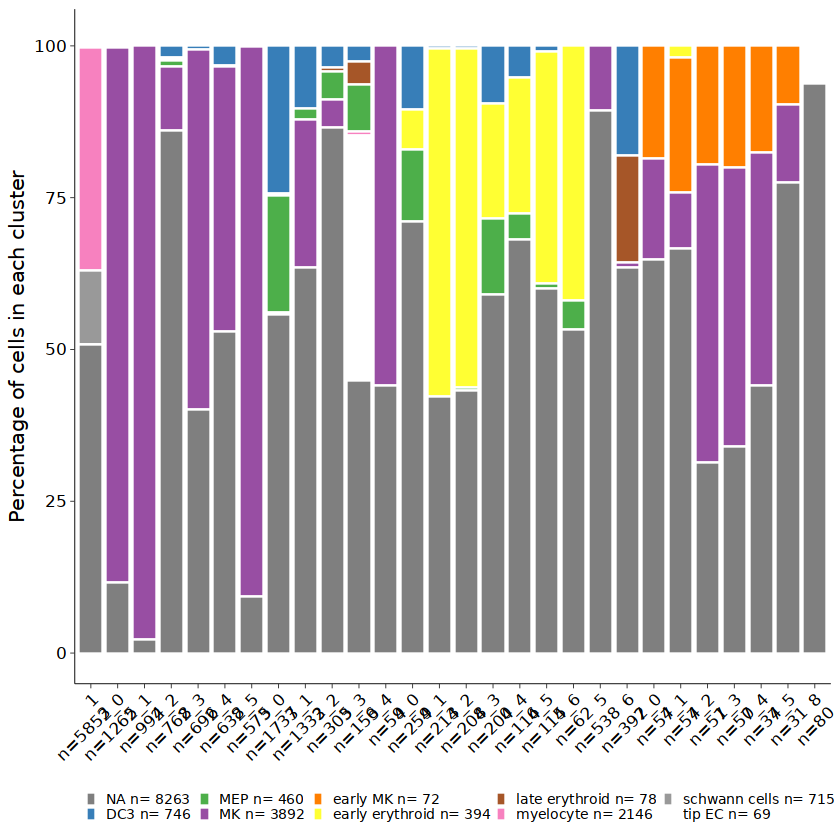

In [62]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table %>%
    mutate(myaxis = paste0(new_clusters, "\n", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(new_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=CellTypist_BMA_label_filtered)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_BMA_label_filtered,
                      drop=F,
                      name="My Annotation", breaks=Freq.table_BMA$CellTypist_BMA_label_filtered,
                      labels=paste(Freq.table_BMA$CellTypist_BMA_label_filtered,
                                   Freq.table_BMA$Freq_CellTypist_BMA_label_filtered, sep =' n= '))+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")
  
  



stacked_barplot
  

### CellTypist_IPSCs_label_filtered vs seurat clusters

In [63]:
met<-adata[[]]

In [64]:
#colnames(met)

In [65]:
met.dt<-data.table(met,key=c("new_clusters","CellTypist_IPSCs_label_filtered"))

In [66]:
#str(met.dt)

In [67]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [68]:
met.dt<-data.table(met, key=c("new_clusters"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [69]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by="new_clusters")
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [70]:
str(Freq.table)

'data.frame':	69 obs. of  5 variables:
 $ new_clusters                   : Factor w/ 28 levels "1","2_0","2_1",..: 1 1 1 1 1 2 2 3 3 4 ...
 $ CellTypist_IPSCs_label_filtered: chr  NA "EmergentMesoderm" "NeuralCrest" "PrimitiveStreak" ...
 $ Freq                           : int  818 41 39 2271 2684 1 1264 1 993 7 ...
 $ TOTAL                          : int  5853 5853 5853 5853 5853 1265 1265 994 994 768 ...
 $ Perc                           : num  13.98 0.7 0.67 38.8 45.86 ...


In [71]:
met.dt<-data.table(met, key=c("CellTypist_IPSCs_label_filtered"))
Freq.table_BMA<-as.data.frame(met.dt[,.(Freq_CellTypist_IPSCs_label_filtered=.N),by=key(met.dt)], stringsAsFactors=F)

Freq.table<-merge(Freq.table,
                  Freq.table_BMA,
                  by="CellTypist_IPSCs_label_filtered")

#Freq.table

In [72]:
str(Freq.table)

'data.frame':	69 obs. of  6 variables:
 $ CellTypist_IPSCs_label_filtered     : chr  "EmergentMesoderm" "ErythrocyteLineage" "ErythrocyteLineage" "ErythrocyteLineage" ...
 $ new_clusters                        : Factor w/ 28 levels "1","2_0","2_1",..: 1 19 23 16 17 22 13 15 18 14 ...
 $ Freq                                : int  41 28 1 2 1 1 3 46 17 72 ...
 $ TOTAL                               : int  5853 62 54 200 116 54 259 208 115 213 ...
 $ Perc                                : num  0.7 45.16 1.85 1 0.86 ...
 $ Freq_CellTypist_IPSCs_label_filtered: int  41 171 171 171 171 171 171 171 171 171 ...


In [73]:
vector_colors_CellTypist_IPSCs_label_filtered<-c(brewer.pal(9, "Set1"),"white")

-------------------------------------->	0 25 50 75 100


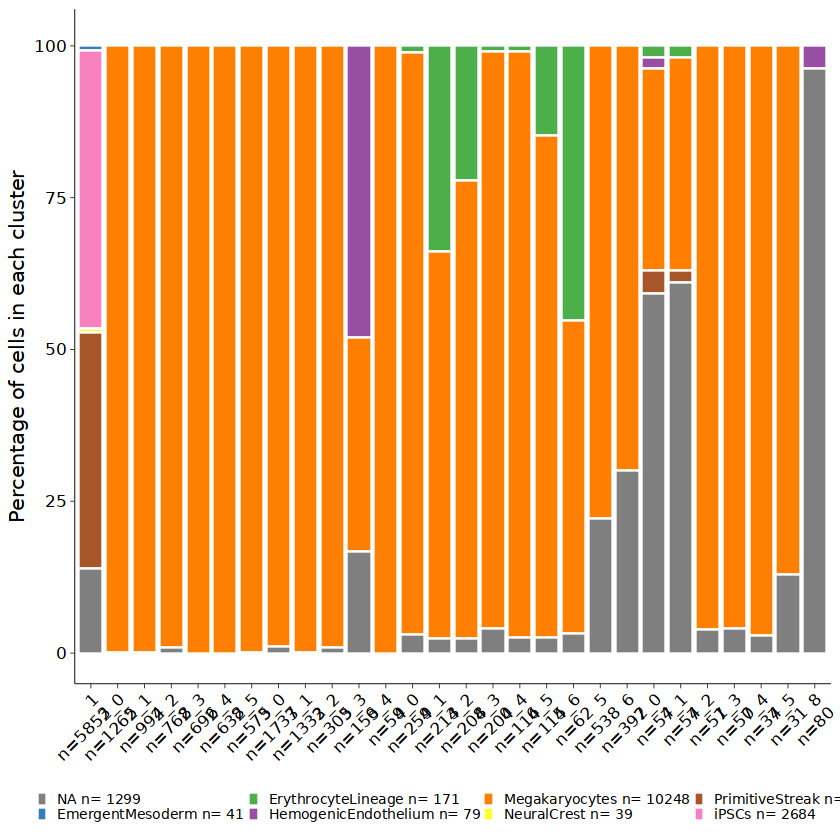

In [74]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table %>%
    mutate(myaxis = paste0(new_clusters, "\n", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(new_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=CellTypist_IPSCs_label_filtered)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_IPSCs_label_filtered,
                      drop=F,
                      name="My Annotation", breaks=Freq.table_BMA$CellTypist_IPSCs_label_filtered,
                      labels=paste(Freq.table_BMA$CellTypist_IPSCs_label_filtered,
                                   Freq.table_BMA$Freq_CellTypist_IPSCs_label_filtered, sep =' n= '))+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")
  
  



stacked_barplot
  

# Redo cell annotation

In [75]:
adata@meta.data$refined_annotation<-NA

## cluster 3_3 and 8 is HemogenicEndothelium

In [76]:
indx<-which(adata@meta.data$new_clusters%in%c('3_3','8'))

str(indx)

 int [1:236] 5853 5854 5855 5856 5857 5858 5859 5860 5861 5864 ...


In [77]:
adata@meta.data$refined_annotation[indx]<-'HemogenicEndothelium'

## cluster 1 is hESCs

In [78]:
indx<-which(adata@meta.data$new_clusters == 1)

str(indx)

 int [1:5853] 1 2 3 4 5 6 7 8 9 10 ...


In [79]:
adata@meta.data$refined_annotation[indx]<-'hESC'

## cluster 2_0, 2_1, 2_3, 2_4, and 2_5 is PolyPlo MK

In [81]:
indx<-which(adata@meta.data$new_clusters%in%c("2_0","2_1","2_3","2_4","2_5"))

str(indx)

 int [1:4168] 6306 6488 6681 6802 6907 7647 7678 7716 8070 8189 ...


In [82]:
adata@meta.data$refined_annotation[indx]<-'PolyPlo MK'

## Majority class of CellTypist_BMA_label_filtered for the rest

In [83]:
indx<-which(is.na(adata@meta.data$refined_annotation))

str(indx)

 int [1:6578] 5862 5863 5884 5885 5896 5904 5907 5908 5910 5943 ...


In [84]:
adata@meta.data$refined_annotation[indx]<-adata@meta.data$CellTypist_BMA_label_filtered[indx]

In [85]:
adata@meta.data$refined_annotation<-factor(adata@meta.data$refined_annotation)

In [86]:
summary(adata@meta.data$refined_annotation)

DC3      early erythroid             early MK 
                 712                  394                   54 
HemogenicEndothelium                 hESC       late erythroid 
                 236                 5853                   72 
                 MEP                   MK            myelocyte 
                 447                  596                    1 
          PolyPlo MK                 NA's 
                4168                 4302

In [100]:
str(Freq.table)

'data.frame':	83 obs. of  6 variables:
 $ refined_annotation     : Factor w/ 10 levels "DC3","early erythroid",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ new_clusters           : Factor w/ 28 levels "1","2_0","2_1",..: 4 8 14 16 15 13 17 21 10 9 ...
 $ Freq                   : int  15 423 1 19 1 27 6 71 11 137 ...
 $ TOTAL                  : int  768 1737 213 200 208 259 116 392 305 1332 ...
 $ Perc                   : num  1.95 24.35 0.47 9.5 0.48 ...
 $ Freq_refined_annotation: int  712 712 712 712 712 712 712 712 712 712 ...


In [101]:
Freq.table_NO_NA<-Freq.table[!is.na(Freq.table$refined_annotation),]

str(Freq.table_NO_NA)

'data.frame':	63 obs. of  6 variables:
 $ refined_annotation     : Factor w/ 10 levels "DC3","early erythroid",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ new_clusters           : Factor w/ 28 levels "1","2_0","2_1",..: 4 8 14 16 15 13 17 21 10 9 ...
 $ Freq                   : int  15 423 1 19 1 27 6 71 11 137 ...
 $ TOTAL                  : int  768 1737 213 200 208 259 116 392 305 1332 ...
 $ Perc                   : num  1.95 24.35 0.47 9.5 0.48 ...
 $ Freq_refined_annotation: int  712 712 712 712 712 712 712 712 712 712 ...


In [102]:
Freq.table_NO_NA.dt<-data.table(Freq.table_NO_NA, key=c('new_clusters'))

In [103]:
Freq.table_NO_NA_MAX<-as.data.frame(Freq.table_NO_NA.dt[,.SD[which.max(Perc)], by=key(Freq.table_NO_NA.dt)], stringsAsFactors=F)

str(Freq.table_NO_NA_MAX)

'data.frame':	28 obs. of  6 variables:
 $ new_clusters           : Factor w/ 28 levels "1","2_0","2_1",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ refined_annotation     : Factor w/ 10 levels "DC3","early erythroid",..: 5 10 10 8 10 10 10 1 8 7 ...
 $ Freq                   : int  5853 1265 994 81 696 638 575 423 324 14 ...
 $ TOTAL                  : int  5853 1265 994 768 696 638 575 1737 1332 305 ...
 $ Perc                   : num  100 100 100 10.6 100 ...
 $ Freq_refined_annotation: int  5853 4168 4168 596 4168 4168 4168 712 596 447 ...


In [104]:
indx.1<-which(adata@meta.data$new_clusters == Freq.table_NO_NA_MAX$new_clusters[1])

str(indx.1)

 int [1:5853] 1 2 3 4 5 6 7 8 9 10 ...


In [105]:
match<-function(x) {which(adata@meta.data$new_clusters == x)}

In [106]:
str(match('1'))

 int [1:5853] 1 2 3 4 5 6 7 8 9 10 ...


In [107]:
LIST<-lapply(Freq.table_NO_NA_MAX$new_clusters, FUN = match)

names(LIST)<-Freq.table_NO_NA_MAX$new_clusters

str(LIST)

List of 28
 $ 1  : int [1:5853] 1 2 3 4 5 6 7 8 9 10 ...
 $ 2_0: int [1:1265] 11018 11035 11036 11043 11044 11046 11053 11059 11063 11069 ...
 $ 2_1: int [1:994] 6306 6488 6681 6802 7647 7678 7716 8070 8189 8200 ...
 $ 2_2: int [1:768] 6134 7472 7941 8055 11017 11021 11022 11028 11030 11045 ...
 $ 2_3: int [1:696] 10139 11019 11038 11040 11067 11073 11086 11087 11120 11133 ...
 $ 2_4: int [1:638] 6907 11041 11049 11051 11054 11055 11057 11068 11070 11082 ...
 $ 2_5: int [1:575] 8286 9177 9440 10156 11026 11050 11083 11095 11116 11134 ...
 $ 3_0: int [1:1737] 5863 5907 5908 5910 5996 6024 6043 6068 6093 6103 ...
 $ 3_1: int [1:1332] 5862 5884 5885 5896 5904 5943 5948 5958 5984 5985 ...
 $ 3_2: int [1:305] 5964 6060 6140 6154 6159 6172 6205 6207 6222 6240 ...
 $ 3_3: int [1:156] 5853 5854 5855 5857 5858 5859 5860 5861 5864 5865 ...
 $ 3_4: int [1:59] 6130 6220 6346 6436 6451 6459 6486 6523 6618 6748 ...
 $ 4_0: int [1:259] 6017 6045 6115 6133 6177 6182 6202 6208 6229 6230 ...
 $ 4_1: int

In [108]:
array<-names(LIST)

adata@meta.data$refined_annotation_majority_vote<-NA

for(i in 1:length(array)){

    cluster<-array[i]

    indx<-LIST[[cluster]]

    str(indx)

    refined_annotation_sel<-as.character((Freq.table_NO_NA_MAX$refined_annotation[which(Freq.table_NO_NA_MAX$new_clusters == cluster)]))

    str(refined_annotation_sel)

    adata@meta.data$refined_annotation_majority_vote[indx]<-refined_annotation_sel
    
    
}

 int [1:5853] 1 2 3 4 5 6 7 8 9 10 ...
 chr "hESC"
 int [1:1265] 11018 11035 11036 11043 11044 11046 11053 11059 11063 11069 ...
 chr "PolyPlo MK"
 int [1:994] 6306 6488 6681 6802 7647 7678 7716 8070 8189 8200 ...
 chr "PolyPlo MK"
 int [1:768] 6134 7472 7941 8055 11017 11021 11022 11028 11030 11045 ...
 chr "MK"
 int [1:696] 10139 11019 11038 11040 11067 11073 11086 11087 11120 11133 ...
 chr "PolyPlo MK"
 int [1:638] 6907 11041 11049 11051 11054 11055 11057 11068 11070 11082 ...
 chr "PolyPlo MK"
 int [1:575] 8286 9177 9440 10156 11026 11050 11083 11095 11116 11134 ...
 chr "PolyPlo MK"
 int [1:1737] 5863 5907 5908 5910 5996 6024 6043 6068 6093 6103 ...
 chr "DC3"
 int [1:1332] 5862 5884 5885 5896 5904 5943 5948 5958 5984 5985 ...
 chr "MK"
 int [1:305] 5964 6060 6140 6154 6159 6172 6205 6207 6222 6240 ...
 chr "MEP"
 int [1:156] 5853 5854 5855 5857 5858 5859 5860 5861 5864 5865 ...
 chr "HemogenicEndothelium"
 int [1:59] 6130 6220 6346 6436 6451 6459 6486 6523 6618 6748 ...
 chr "MK

In [109]:
adata@meta.data$refined_annotation_majority_vote<-factor(adata@meta.data$refined_annotation_majority_vote)

In [110]:
summary(adata@meta.data$refined_annotation_majority_vote)

DC3      early erythroid             early MK 
                2129                  914                  108 
HemogenicEndothelium                 hESC                  MEP 
                 236                 5853                  564 
                  MK           PolyPlo MK 
                2863                 4168

# DotPlot on refined_annotation_majority_vote

In [111]:
adata

An object of class Seurat 
442958 features across 16835 samples within 4 assays 
Active assay: ATAC (340606 features, 340606 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn, harmony.rna, harmony.atac

In [112]:
genes<-Features(adata[['SCT']])

str(genes)

 chr [1:29150] "AL627309.1" "AL627309.5" "AL627309.4" "AL669831.2" ...


In [113]:
indx<-grep("^RUNX1", genes)

str(indx)

 int [1:2] 12678 27361


In [114]:
# https://www.ahajournals.org/doi/full/10.1161/CIRCRESAHA.121.319821

select<-genes[indx]

select

[1] "RUNX1T1" "RUNX1"

Warning message:
"The following requested variables were not found: RUNX1C"


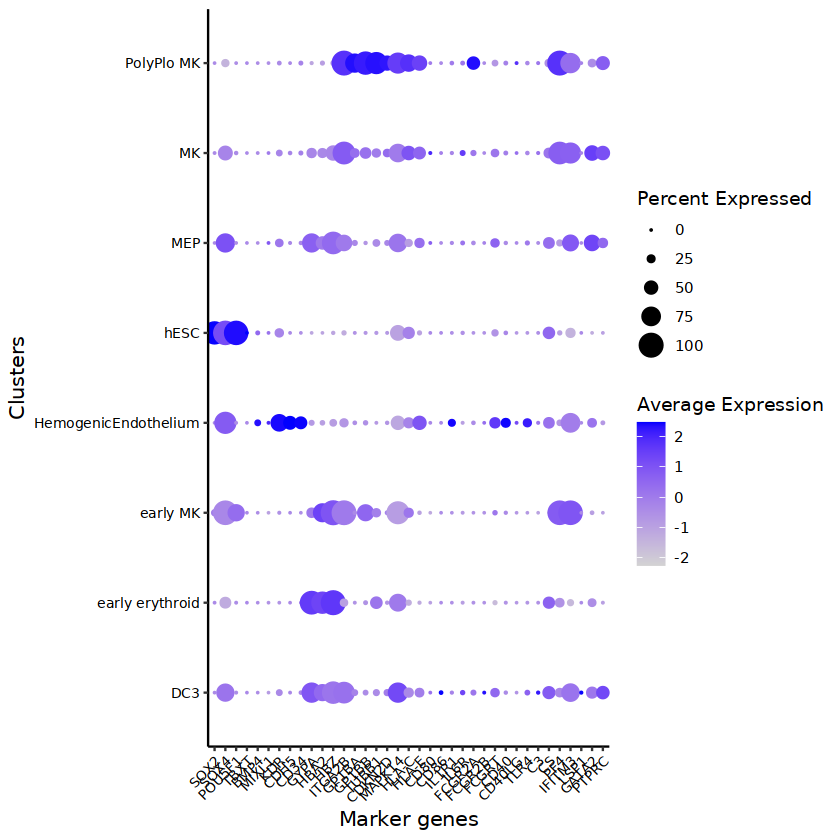

In [115]:
dotplot3<-DotPlot(
  adata,
    features=c(markers,'HLA-C','HLA-E','CD80','CD86','IL1R1','IL6R','FCGR2A','FCGR2B','FCGRT',
               'CD40','CD40LG','TLR4','C3','CS','PF4','IFITM3','LSP1','RUNX1C','GATA2','PTPRC'),
  assay = "SCT",
    group.by="refined_annotation_majority_vote")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

## new path_graphs

In [116]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_explore_subclustering/"


In [117]:
if (file.exists(path_graphs)){

    }else{

    dir.create(path_graphs)
    }

NULL

In [118]:
setwd(path_graphs)

svgname<-paste("Dotplot_marker_genes_by_refined_annotation_majority_vote",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png", width =13, height = 13)
}

# DC3 is not real revert to MEP

In [119]:
adata@meta.data$refined_annotation_majority_vote<-revalue(adata@meta.data$refined_annotation_majority_vote, c('DC3' = 'MEP'))

In [120]:
summary(adata@meta.data$refined_annotation_majority_vote)

MEP      early erythroid             early MK 
                2693                  914                  108 
HemogenicEndothelium                 hESC                   MK 
                 236                 5853                 2863 
          PolyPlo MK 
                4168

In [121]:
adata@meta.data$refined_annotation_majority_vote<-factor(adata@meta.data$refined_annotation_majority_vote,
                                                        levels=c('hESC','HemogenicEndothelium','MEP','early erythroid','early MK','MK','PolyPlo MK'), ordered=T)

summary(adata@meta.data$refined_annotation_majority_vote)

hESC HemogenicEndothelium                  MEP 
                5853                  236                 2693 
     early erythroid             early MK                   MK 
                 914                  108                 2863 
          PolyPlo MK 
                4168

# Wnn graphs 

## refined_annotation_majority_vote

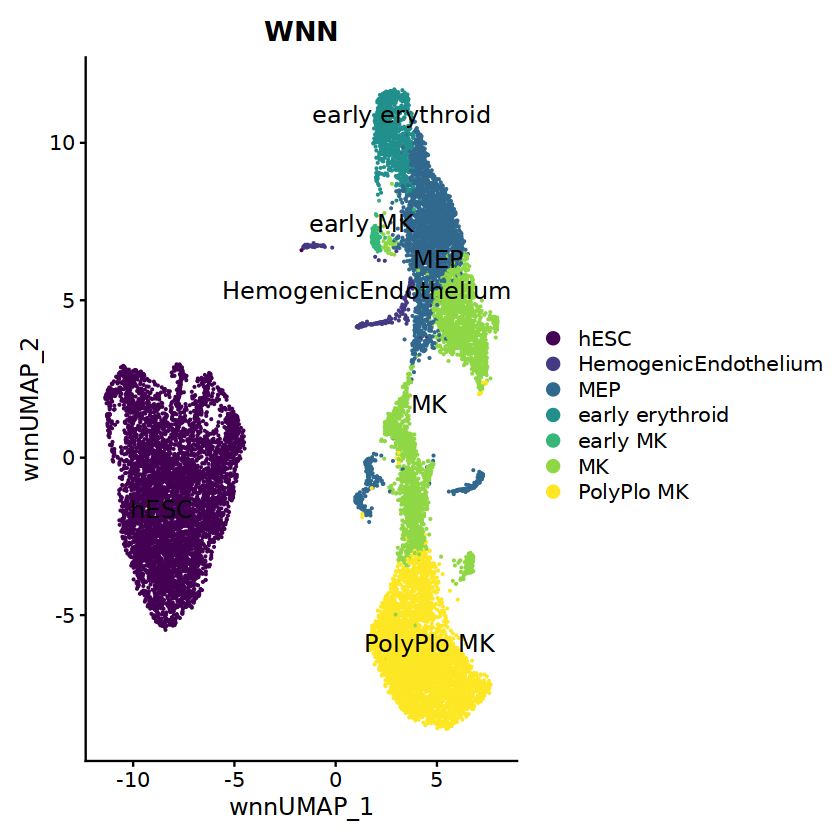

In [225]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "refined_annotation_majority_vote", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("WNN")
p3


In [228]:
setwd(path_graphs)

svgname<-paste("WNN_refined_annotation_majority_vote",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= p3,
         device="png", height=7, width=9)
}

## WNN by marker genes

png 
  2

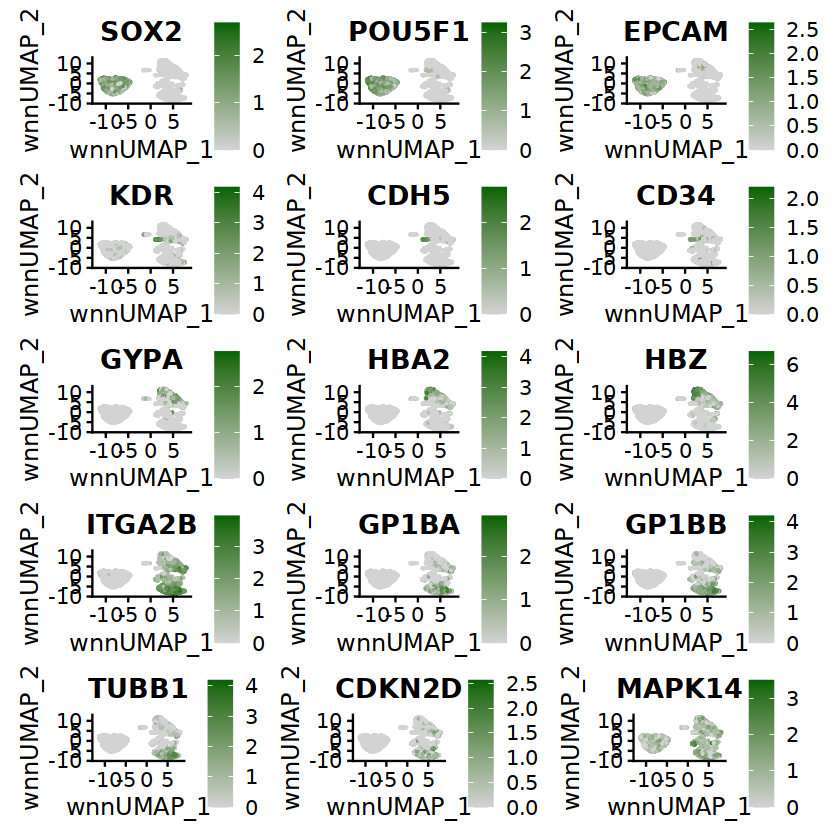

In [126]:
## Graph 

DefaultAssay(adata) <- 'SCT'


p5 <- FeaturePlot(adata, features = c('SOX2','POU5F1','EPCAM'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

p5_B <- FeaturePlot(adata, features = c("KDR",'CDH5','CD34'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)
p5_1 <- FeaturePlot(adata, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5_3 <- FeaturePlot(adata, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_6 <- FeaturePlot(adata, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5 / p5_B / p5_1 / p5_3 / p_6

setwd(path_graphs)
png(file='WNN_marker_genes.png', width =1000, height = 1250)
p5 / p5_B / p5_1 / p5_3 / p_6
dev.off()


# DotPlot

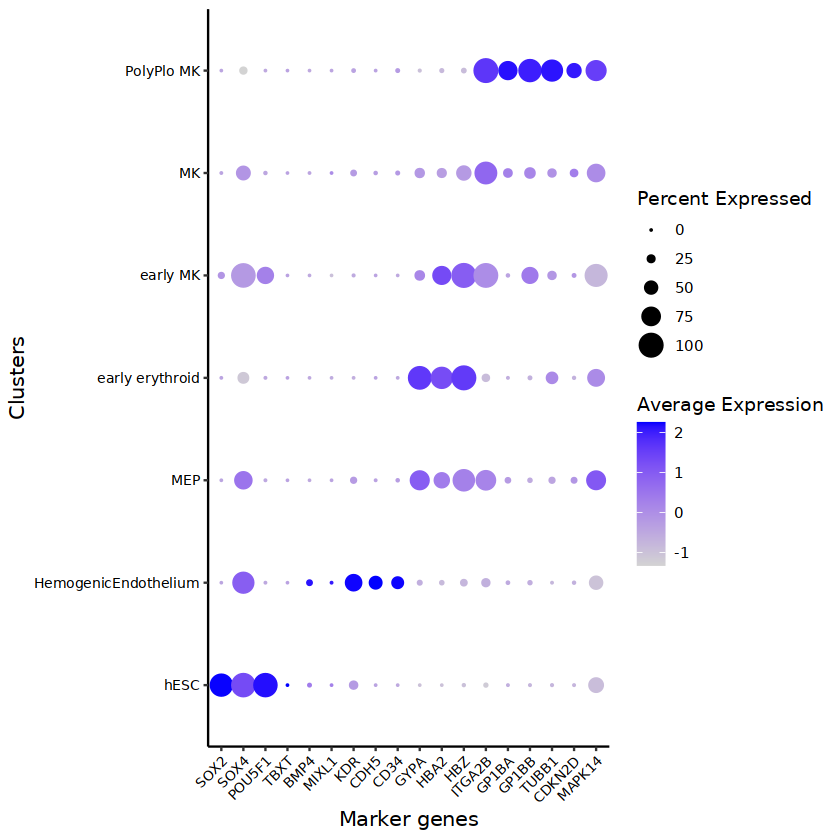

In [127]:
dotplot3<-DotPlot(
  adata,
    features=markers,
  assay = "SCT",
    group.by="refined_annotation_majority_vote")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

In [128]:
setwd(path_graphs)

svgname<-paste("Dotplot_marker_genes_by_refined_annotation_majority_vote_DEF",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png")
}

Saving 6.67 x 6.67 in image


## DotPlot on polyploidy markers

In [129]:
genes<-Features(adata[['SCT']])

str(genes)

 chr [1:29150] "AL627309.1" "AL627309.5" "AL627309.4" "AL669831.2" ...


In [130]:
indx<-grep("^TUB", genes)

str(indx)

 int [1:28] 3911 3926 4555 4556 9131 9133 9481 10170 14160 14182 ...


In [131]:
# https://www.ahajournals.org/doi/full/10.1161/CIRCRESAHA.121.319821

select<-genes[indx]

select

[1] "TUBA3E"  "TUBA3D"  "TUBA4A"  "TUBA4B"  "TUBB2A"  "TUBB2B"  "TUBB"   
 [8] "TUBE1"   "TUBB4B"  "TUBB8"   "TUBAL3"  "TUBGCP2" "TUB"     "TUBA1B" 
[15] "TUBA1A"  "TUBA1C"  "TUBGCP3" "TUBGCP5" "TUBGCP4" "TUBB3"   "TUBG1"  
[22] "TUBG2"   "TUBD1"   "TUBB6"   "TUBB4A"  "TUBB1"   "TUBA8"   "TUBGCP6"

In [136]:
# https://ashpublications.org/blood/article/109/8/3225/23675/Interrelation-between-polyploidization-and



PP_markers<-unique(c(c("TUBA4","TUBA1","TUBB1","TUBA2","TUBA6"),
                     c("CDKN2D","MAPRE2","MAPRE1","S100A10","SPARC","YWHAH","MAPK14","INSIG1","CCNG1","PELO","CETN2","CCNA2","DBF4","RAD21"),            
              c("RAD21"),
                     c("LIG1","PFAS","RAD54L","RAD51","RFC5","CHAF1A","CHAF1B","MCM7","MCM4","MCM6","MCM3","MCM5","MCM2","UHRF1","SMARCA3","CHTF18","FEN1","CDC45L","RPA2","POLD3","MSH2","PCNA","MSH6","MGC5528")

             ))

 c("KNTC1","CHAF1A","NASP","MCM3","LRPPRC","E2F1","CDCA7","PKMYT1","CDC2L1","IFI16")


[1] "KNTC1"  "CHAF1A" "NASP"   "MCM3"   "LRPPRC" "E2F1"   "CDCA7"  "PKMYT1"
 [9] "CDC2L1" "IFI16"

In [137]:
base<-c("NANOG",'SOX2','SOX4','POU5F1',"TBXT",'BMP4','MIXL1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA')

Warning message:
"The following requested variables were not found: TUBA4, TUBA1, TUBA2, TUBA6, SMARCA3, CDC45L, MGC5528"


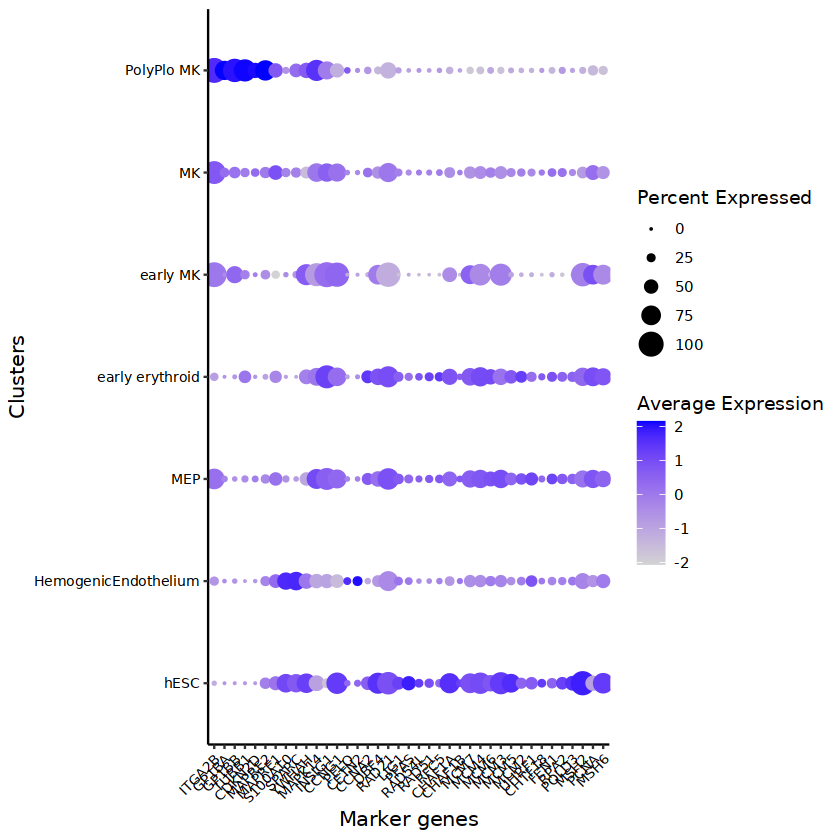

In [138]:
dotplot3<-DotPlot(
  adata,
    features=unique(c('ITGA2B','GP1BA','GP1BB',PP_markers)),
  assay = "SCT",
    group.by="refined_annotation_majority_vote")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

In [139]:
setwd(path_graphs)

svgname<-paste("Dotplot_polyploidy_genes",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png")
}

Saving 6.67 x 6.67 in image


# New clone line and genotype levels

In [154]:
colnames(adata@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "No_assigned_GFPbc"                 "Assigned_GFPbc"                   
[47] "Assigned_GFPgenotype"              "DBL_comb"                         
[49] "amulet_nFrags"                     "amulet_uniqFrags"                 
[51] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[53] "amulet_p.value"                    "amulet_q.value"                   
[55] "doublet_amulet"                    "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.0.2"                     
[61] "seurat_clusters"                   "doublet"                          
[63] "wsnn_res.2"                        "wsnn_res.0.5"                     
[65] "wsnn_res.0.25"                     "CellTypist_BMA_label"             
[67] "CellTypist_BMA_conf_score"         "CellTypist_IPSCs_label"           
[69] "CellTypist_IPSCs_conf_score"       "CellTypist_BMA_label_filtered"    
[71] "CellTypist_IPSCs_label_filtered"   "time_point"                       
[73] "time"                              "nucleosome_signal"                
[75] "nucleosome_percentile"             "FRiP"                             
[77] "atac_pct_reads_in_peaks"           "my_anot"                          
[79] "FOI"                               "my_anot_updated"                  
[81] "majority_voting_BMA"               "majority_voting_iPSCs"            
[83] "current_anot"                      "Assignation_demux_NO_CB"          
[85] "Assigned_GFPbc_demux_NO_CB"        "Assignation_demux_CB"             
[87] "Assigned_GFPbc_demux_CB"           "Assigned_GFPbc_integral"          
[89] "Assigned_GFPgenotype_integral"     "Subclusters_3"                    
[91] "Subclusters_4"                     "Subclusters_7"                    
[93] "Subclusters_2"                     "new_clusters"                     
[95] "refined_annotation"                "refined_annotation_majority_vote"

In [155]:
summary(adata@meta.data$Assigned_GFPbc_integral)

chrGFP_WTA       chrGFP_WTB       chrGFP_WTC       chrGFP_rs1 
             130              226              305              872 
      chrGFP_rs2       chrGFP_rs3    chrGFP_R882H1    chrGFP_R882H2 
             776             7996             1101              123 
   chrGFP_R882H3 chrGFP_rs_R882H1 chrGFP_rs_R882H2 chrGFP_rs_R882H3 
            2355             1381              706              864

In [158]:
summary(adata@meta.data$Assigned_GFPgenotype_integral)

wt      CHEK2 T/T   DNMT3A R882H Double mutants 
           661           9644           3579           2951

In [159]:
adata@meta.data$clone_line<-adata@meta.data$Assigned_GFPbc_integral

In [160]:
adata@meta.data$clone_line<-revalue(adata@meta.data$clone_line,
                                   c('chrGFP_WTA' = 'wt_1',
                                    'chrGFP_WTB' = 'wt_2',
                                     'chrGFP_WTC' = 'wt_3',
                                    'chrGFP_rs1' = 'rs62237617_1',
                                     'chrGFP_rs2' = 'rs62237617_2',
                                     'chrGFP_rs3' = 'rs62237617_3',
                                     'chrGFP_R882H1' = 'DNMT3A_1',
                                     'chrGFP_R882H2' = 'DNMT3A_2',
                                     'chrGFP_R882H3' = 'DNMT3A_3',
                                     'chrGFP_rs_R882H1' = 'rs62237617_DNMT3A_1',
                                     'chrGFP_rs_R882H2' = 'rs62237617_DNMT3A_2',
                                     'chrGFP_rs_R882H3' = 'rs62237617_DNMT3A_3') 
                                   )

In [161]:
summary(adata@meta.data$clone_line)

wt_1                wt_2                wt_3        rs62237617_1 
                130                 226                 305                 872 
       rs62237617_2        rs62237617_3            DNMT3A_1            DNMT3A_2 
                776                7996                1101                 123 
           DNMT3A_3 rs62237617_DNMT3A_1 rs62237617_DNMT3A_2 rs62237617_DNMT3A_3 
               2355                1381                 706                 864

In [155]:
summary(adata@meta.data$Assigned_GFPbc_integral)

chrGFP_WTA       chrGFP_WTB       chrGFP_WTC       chrGFP_rs1 
             130              226              305              872 
      chrGFP_rs2       chrGFP_rs3    chrGFP_R882H1    chrGFP_R882H2 
             776             7996             1101              123 
   chrGFP_R882H3 chrGFP_rs_R882H1 chrGFP_rs_R882H2 chrGFP_rs_R882H3 
            2355             1381              706              864

In [164]:
summary(adata@meta.data$Assigned_GFPgenotype_integral)

wt      CHEK2 T/T   DNMT3A R882H Double mutants 
           661           9644           3579           2951

In [165]:
adata@meta.data$Genotype<-adata@meta.data$Assigned_GFPgenotype_integral

In [166]:
adata@meta.data$Genotype<-revalue(adata@meta.data$Genotype,
                                   c('wt' = 'wt',
                                    'CHEK2 T/T' = 'rs62237617',
                                     'DNMT3A R882H' = 'DNMT3A',
                                    'Double mutants' = 'rs62237617_DNMT3A') 
                                   )

In [167]:
summary(adata@meta.data$Genotype)

wt        rs62237617            DNMT3A rs62237617_DNMT3A 
              661              9644              3579              2951

# Show the genotype breakdown

## Freq tables clone_line vs time_point vs refined_annotation_majority_vote

In [170]:
met<-adata[[]]

In [171]:
met.dt<-data.table(met,key=c("time_point","refined_annotation_majority_vote","clone_line"))

In [172]:
#str(met.dt)

In [173]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [174]:
met.dt<-data.table(met, key=c("time_point","refined_annotation_majority_vote"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [175]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","refined_annotation_majority_vote"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [176]:
str(Freq.table)

'data.frame':	131 obs. of  6 variables:
 $ time_point                      : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ refined_annotation_majority_vote: Ord.factor w/ 7 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                            : int  60 132 80 130 119 242 893 98 2277 506 ...
 $ TOTAL                           : int  5852 5852 5852 5852 5852 5852 5852 5852 5852 5852 ...
 $ Perc                            : num  1.03 2.26 1.37 2.22 2.03 ...


In [177]:
met.dt<-data.table(met, key=c("time_point"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)

Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by="time_point")

#Freq.table

In [178]:
str(Freq.table)

'data.frame':	131 obs. of  7 variables:
 $ time_point                      : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ refined_annotation_majority_vote: Ord.factor w/ 7 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                            : int  60 132 80 130 119 242 893 98 2277 506 ...
 $ TOTAL                           : int  5852 5852 5852 5852 5852 5852 5852 5852 5852 5852 ...
 $ Perc                            : num  1.03 2.26 1.37 2.22 2.03 ...
 $ ntime                           : int  5852 5852 5852 5852 5852 5852 5852 5852 5852 5852 ...


In [179]:
Freq.TOTAL<-merge(Freq.TOTAL,
                  Freq.time_point,
                  by="time_point")

In [180]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 50),]

str(Freq.table_filtered)

'data.frame':	97 obs. of  7 variables:
 $ time_point                      : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ refined_annotation_majority_vote: Ord.factor w/ 7 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                            : int  60 132 80 130 119 242 893 98 2277 506 ...
 $ TOTAL                           : int  5852 5852 5852 5852 5852 5852 5852 5852 5852 5852 ...
 $ Perc                            : num  1.03 2.26 1.37 2.22 2.03 ...
 $ ntime                           : int  5852 5852 5852 5852 5852 5852 5852 5852 5852 5852 ...


In [181]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

-------------------------------------->	0 25 50 75 100


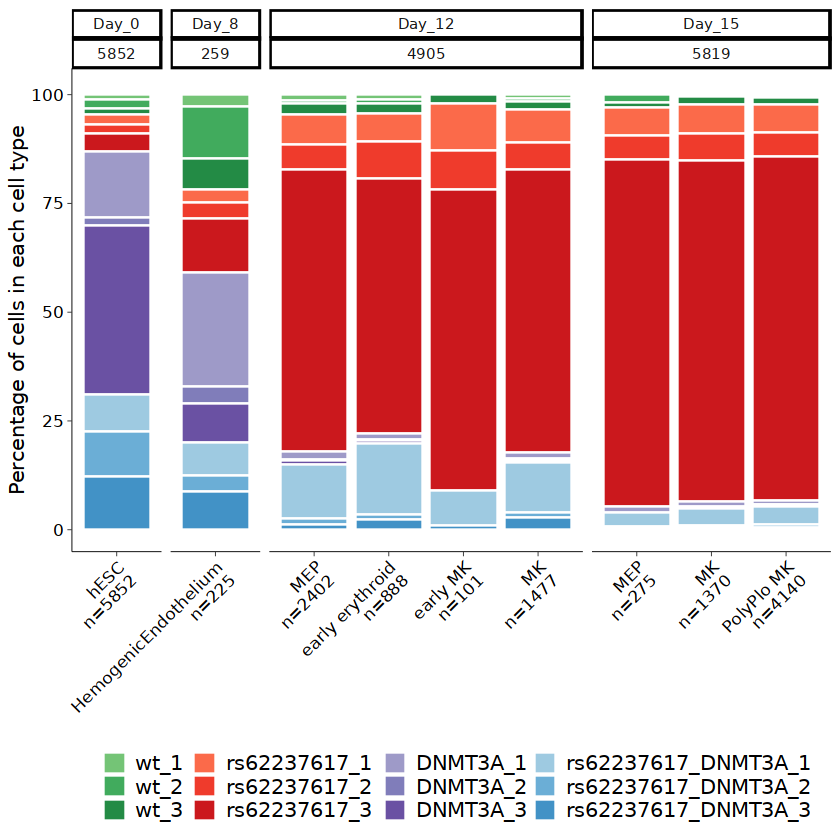

In [183]:
#### Stacked Graph #2---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(refined_annotation_majority_vote, "\n", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(refined_annotation_majority_vote)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=clone_line)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="My Annotation")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ time_point+ntime, scales='free_x', space='free_x', switch="y", labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime)))+   
    scale_x_discrete(name="Seurat clusters", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [185]:
setwd(path_graphs)

svgname<-paste("stacked_barplot_time_point_refined_annotation_majority_vote_vs_clone_line",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png",
        width=12, height=8)
}

# line plot referred to genotype wt

In [186]:
met<-adata[[]]

In [187]:
met.dt<-data.table(met,key=c("time_point","clone_line","Genotype"))

In [188]:
#str(met.dt)

In [198]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
str(Freq.table)

'data.frame':	48 obs. of  4 variables:
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 1 1 1 2 2 2 3 3 3 4 ...
 $ Freq      : int  60 132 80 130 119 242 893 98 2277 506 ...


## normalize by number of cell counts at time 0

In [201]:
time_0<-Freq.table[which(Freq.table$time_point == 'Day_0'),]

str(time_0)
cat("\n")


time_0_sub<-time_0[,which(colnames(time_0)%in%c('clone_line','Freq'))]


colnames(time_0_sub)[which(colnames(time_0_sub) == 'Freq')]<-'cells_at_day_0'


str(time_0_sub)
cat("\n")


'data.frame':	12 obs. of  4 variables:
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 1 1 1 2 2 2 3 3 3 4 ...
 $ Freq      : int  60 132 80 130 119 242 893 98 2277 506 ...

'data.frame':	12 obs. of  2 variables:
 $ clone_line    : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ cells_at_day_0: int  60 132 80 130 119 242 893 98 2277 506 ...



In [202]:
Freq.table<-merge(Freq.table,
                 time_0_sub,
                 by=c('clone_line'))

str(Freq.table)

'data.frame':	48 obs. of  5 variables:
 $ clone_line    : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 7 7 8 8 8 8 9 9 ...
 $ time_point    : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 3 4 1 2 3 4 1 2 ...
 $ Genotype      : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Freq          : int  893 68 77 63 98 9 13 3 2277 24 ...
 $ cells_at_day_0: int  893 893 893 893 98 98 98 98 2277 2277 ...


In [203]:
Freq.table$cells_relative_to_time_0<-Freq.table$Freq/Freq.table$cells_at_day_0

str(Freq.table)

'data.frame':	48 obs. of  6 variables:
 $ clone_line              : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 7 7 8 8 8 8 9 9 ...
 $ time_point              : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 3 4 1 2 3 4 1 2 ...
 $ Genotype                : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Freq                    : int  893 68 77 63 98 9 13 3 2277 24 ...
 $ cells_at_day_0          : int  893 893 893 893 98 98 98 98 2277 2277 ...
 $ cells_relative_to_time_0: num  1 0.0761 0.0862 0.0705 1 ...


## calculate mean and sd

In [204]:
Freq.table.dt<-data.table(Freq.table,
                                           key=c('Genotype','time_point'))
      
      
      
      Mean_counts_relative<-as.data.frame(Freq.table.dt[,.(cells_relative_to_time_0=mean(cells_relative_to_time_0),
                                                                 sd=sd(cells_relative_to_time_0)), by=key(Freq.table.dt)], stringsAsFactors=F)
      
      Mean_counts_relative$cells_relative_to_time_0_max<-Mean_counts_relative$cells_relative_to_time_0+Mean_counts_relative$sd
      Mean_counts_relative$cells_relative_to_time_0_min<-Mean_counts_relative$cells_relative_to_time_0-Mean_counts_relative$sd


str(Mean_counts_relative)
cat("\n")

'data.frame':	16 obs. of  6 variables:
 $ Genotype                    : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 1 1 1 1 2 2 2 2 3 3 ...
 $ time_point                  : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 3 4 1 2 3 4 1 2 ...
 $ cells_relative_to_time_0    : num  1 0.182 0.876 0.506 1 ...
 $ sd                          : num  0 0.0707 0.5865 0.5839 0 ...
 $ cells_relative_to_time_0_max: num  1 0.252 1.463 1.09 1 ...
 $ cells_relative_to_time_0_min: num  1 0.1109 0.2899 -0.0781 1 ...



## line plot 1

In [207]:
vector_fill<-c(brewer.pal(9, "Greens")[c(6)],brewer.pal(9, "Reds")[c(6)],brewer.pal(9, "Purples")[c(6)],brewer.pal(9, "Blues")[c(5)])

vector_fill

[1] "#41AB5D" "#EF3B2C" "#807DBA" "#6BAED6"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


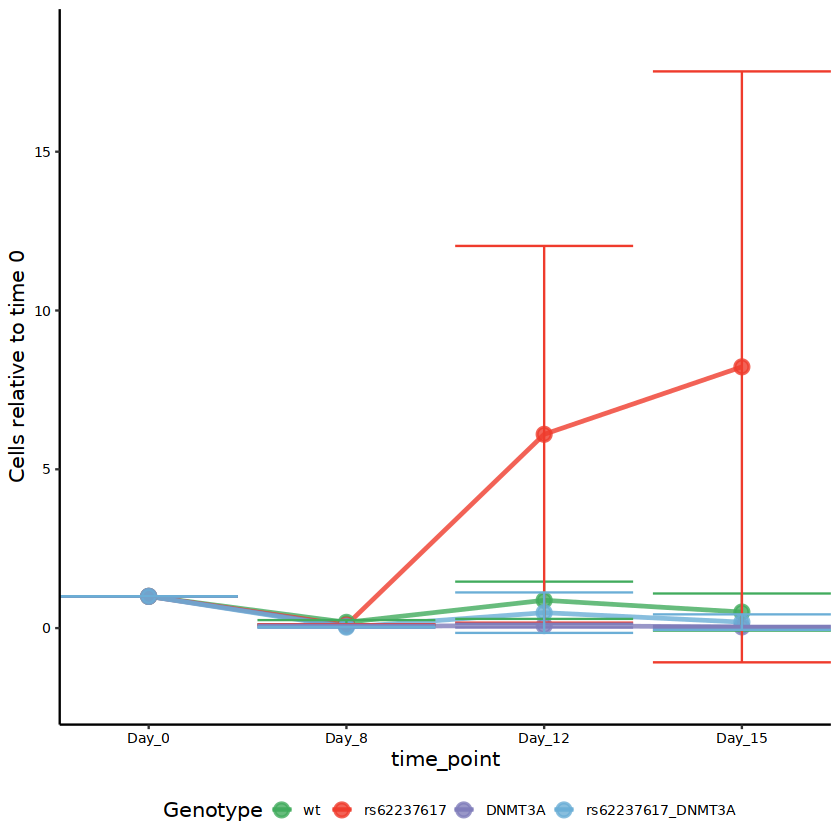

In [212]:
graph_Mean_counts_relative<-ggplot(data=Mean_counts_relative,
                                aes(x=time_point,
                                    y=cells_relative_to_time_0))+          
        geom_line(aes(group=Genotype, 
                      color=Genotype), 
                  size=1, alpha=0.8)+
        scale_color_manual(values=vector_fill, drop=F)+      
        geom_point(aes(fill=Genotype, color=Genotype),
                   size=3, shape=21, stroke=1, alpha=0.8)+
        geom_errorbar(aes(ymin=cells_relative_to_time_0_min, ymax=cells_relative_to_time_0_max,
                                        group=Genotype, 
                                        color=Genotype))+
        scale_color_manual(values=vector_fill, drop=F)+
        scale_fill_manual(values=vector_fill, drop=F)+
        scale_x_discrete(name="time_point", expand = c(0.1, 0.1))+     
        scale_y_continuous(name="Cells relative to time 0", expand = c(0.1, 0.1))+
         theme_classic()+
              theme(axis.title=element_blank(),
                    axis.title.y=element_text(size=12,color="black", family="sans"),
                    axis.title.x=element_text(size=12,color="black", family="sans"),
                    axis.text.y=element_text(size=8,color="black", family="sans"),
                    axis.text.x=element_text(size=8,color="black", family="sans"))+
              theme(legend.title = element_text(size=12),
                    legend.text = element_text(size=8),
                    legend.key.size = unit(0.5, 'cm'), #change legend key size
                    legend.key.height = unit(0.5, 'cm'), #change legend key height
                    legend.key.width = unit(0.5, 'cm'), #change legend key width
                    legend.position="bottom")+
              guides(fill=guide_legend(nrow=2,byrow=TRUE))


graph_Mean_counts_relative





In [213]:
Mean_counts_relative

Genotype,time_point,cells_relative_to_time_0,sd,cells_relative_to_time_0_max,cells_relative_to_time_0_min
<ord>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>
wt,Day_0,1.00000000,0.00000000,1.00000000,1.000000000
wt,Day_8,0.18156566,0.07068768,0.25225333,0.110877979
wt,Day_12,0.87638889,0.58648454,1.46287343,0.289904345
wt,Day_15,0.50580808,0.58389600,1.08970408,-0.078087916
rs62237617,Day_0,1.00000000,0.00000000,1.00000000,1.000000000
rs62237617,Day_8,0.09521156,0.02747337,0.12268493,0.067738195
rs62237617,Day_12,6.10266952,5.93032030,12.03298982,0.172349224
rs62237617,Day_15,8.22545992,9.30300977,17.52846969,-1.077549844
DNMT3A,Day_0,1.00000000,0.00000000,1.00000000,1.000000000


In [214]:
Freq.table

clone_line,time_point,Genotype,Freq,cells_at_day_0,cells_relative_to_time_0
<ord>,<ord>,<ord>,<int>,<int>,<dbl>
DNMT3A_1,Day_0,DNMT3A,893,893,1.000000000
DNMT3A_1,Day_8,DNMT3A,68,893,0.076147816
DNMT3A_1,Day_12,DNMT3A,77,893,0.086226204
DNMT3A_1,Day_15,DNMT3A,63,893,0.070548712
DNMT3A_2,Day_0,DNMT3A,98,98,1.000000000
DNMT3A_2,Day_8,DNMT3A,9,98,0.091836735
DNMT3A_2,Day_12,DNMT3A,13,98,0.132653061
DNMT3A_2,Day_15,DNMT3A,3,98,0.030612245
DNMT3A_3,Day_0,DNMT3A,2277,2277,1.000000000


In [181]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


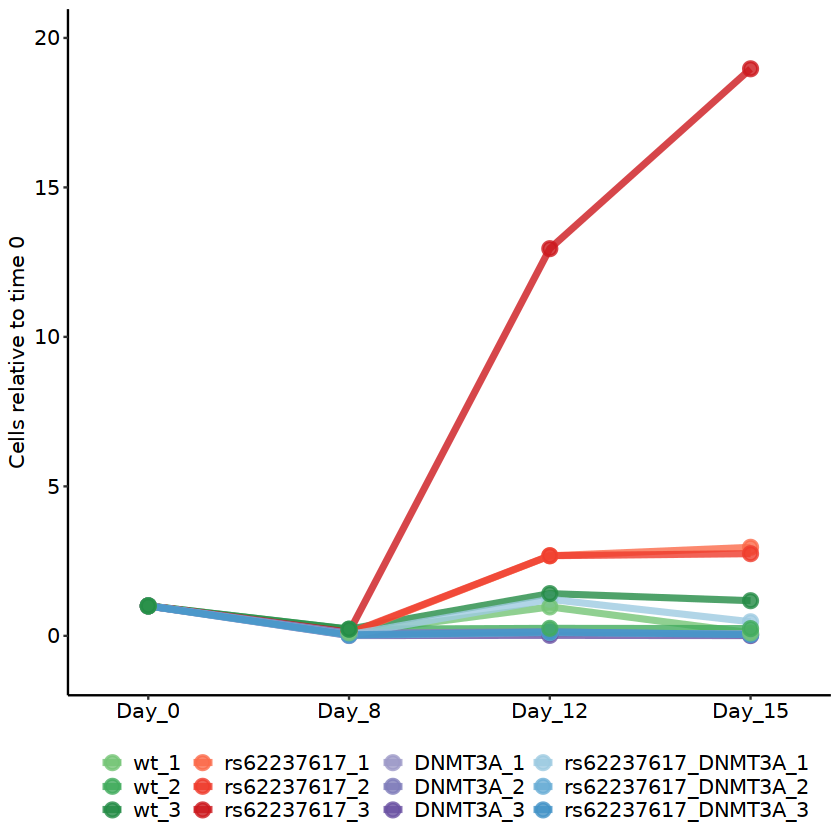

In [221]:
graph_Freq.table<-ggplot(data=Freq.table,
                                aes(x=time_point,
                                    y=cells_relative_to_time_0))+          
        geom_line(aes(group=clone_line, 
                      color=clone_line), 
                  size=1.5, alpha=0.8)+
        scale_color_manual(values=vector_fill, drop=F)+      
        geom_point(aes(fill=clone_line, color=clone_line),
                   size=3, shape=21, stroke=1, alpha=0.8)+        
        scale_color_manual(values=fill_colours, drop=F)+
        scale_fill_manual(values=fill_colours, drop=F)+
        scale_x_discrete(name="time_point", expand = c(0.1, 0.1))+     
        scale_y_continuous(name="Cells relative to time 0", expand = c(0.1, 0.1))+
         theme_classic()+
              theme(axis.title=element_blank(),
                    axis.title.y=element_text(size=12,color="black", family="sans"),
                    axis.title.x=element_blank(),
                    axis.text.y=element_text(size=12,color="black", family="sans"),
                    axis.text.x=element_text(size=12,color="black", family="sans"))+
              theme(legend.title = element_blank(),
                    legend.text = element_text(size=12),
                    legend.key.size = unit(0.5, 'cm'), #change legend key size
                    legend.key.height = unit(0.5, 'cm'), #change legend key height
                    legend.key.width = unit(0.5, 'cm'), #change legend key width
                    legend.position="bottom")+
              guides(fill=guide_legend(nrow=2,byrow=TRUE))


graph_Freq.table

In [222]:
setwd(path_graphs)

svgname<-paste("Line_plot_clone_line_relative_changes_in_abundance",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= graph_Freq.table,
         device="png",
        width=12, height=8)
}

# SAVE

In [223]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [224]:
saveRDS(adata, file="merged_clusters_after_genotyping_after_refined_annotation.rds")

# DESEq2 for DE genes per cluster

## Load packages from new environment

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"))
.libPaths()
# sessionInfo()
Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/bin/python")

suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(dplyr)) 
suppressMessages(library(ggplot2)) 
suppressMessages(library(Matrix)) 
suppressMessages(library(data.table)) 
suppressMessages(library(ggpubr)) 
suppressMessages(library(ggplot2))
suppressMessages(library(pheatmap))
suppressMessages(library(presto))
suppressMessages(library("qlcMatrix"))
suppressMessages(library("cowplot"))
suppressMessages(library("RColorBrewer"))
suppressMessages(library("plyr"))
suppressMessages(library("forcats"))
suppressMessages(library('ggeasy'))
suppressMessages(library('dplyr'))
suppressMessages(library("svglite"))
suppressMessages(library("ape"))
suppressMessages(library("ggforce"))
suppressMessages(library("tidyr"))
suppressMessages(library("edgeR"))
suppressMessages(library("apeglm"))
suppressMessages(library("DESeq2"))
suppressMessages(library("tibble")) 
library("ggrepel")

[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘Matrix’ was built under R version 4.3.3”
Warning message:
“package ‘qlcMatrix’ was built under R version 4.3.3”
Warning message:
“package ‘slam’ was built under R version 4.3.3”
Warning message:
“package ‘sparsesvd’ was built under R version 4.3.3”
Warning message:
“package ‘ggeasy’ was built under R version 4.3.3”
Warning message:
“package ‘svglite’ was built under R version 4.3.3”
Warning message:
“package ‘ape’ was built under R version 4.3.3”
Warning message:
“package ‘ggforce’ was built under R version 4.3.3”
Warning message:
“package ‘edgeR’ was built under R version 4.3.3”
Warning message:
“package ‘limma’ was built under R version 4.3.3”
Warning message:
“package ‘apeglm’ was built under R version 4.3.3”
Warning message:
“package ‘DESeq2’ was bu

## Pickup

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

adata<-readRDS(file="merged_clusters_after_genotyping_after_refined_annotation.rds")

## Check genotype factor

In [3]:
summary(adata@meta.data$Genotype)

wt        rs62237617            DNMT3A rs62237617_DNMT3A 
              661              9644              3579              2951

## Create a variable to correct for clone line and time_point

In [4]:
 adata$sample_id<-droplevels(interaction(adata$clone_line,adata$time_point, sep="_"))
  
cat(sprintf(as.character(names(summary(adata$sample_id)))))
cat("\n")
cat(sprintf(as.character(summary(adata$sample_id))))
cat("\n")

wt_1_Day_0 wt_2_Day_0 wt_3_Day_0 rs62237617_1_Day_0 rs62237617_2_Day_0 rs62237617_3_Day_0 DNMT3A_1_Day_0 DNMT3A_2_Day_0 DNMT3A_3_Day_0 rs62237617_DNMT3A_1_Day_0 rs62237617_DNMT3A_2_Day_0 rs62237617_DNMT3A_3_Day_0 wt_1_Day_8 wt_2_Day_8 wt_3_Day_8 rs62237617_1_Day_8 rs62237617_2_Day_8 rs62237617_3_Day_8 DNMT3A_1_Day_8 DNMT3A_2_Day_8 DNMT3A_3_Day_8 rs62237617_DNMT3A_1_Day_8 rs62237617_DNMT3A_2_Day_8 rs62237617_DNMT3A_3_Day_8 wt_1_Day_12 wt_2_Day_12 wt_3_Day_12 rs62237617_1_Day_12 rs62237617_2_Day_12 rs62237617_3_Day_12 DNMT3A_1_Day_12 DNMT3A_2_Day_12 DNMT3A_3_Day_12 rs62237617_DNMT3A_1_Day_12 rs62237617_DNMT3A_2_Day_12 rs62237617_DNMT3A_3_Day_12 wt_1_Day_15 wt_2_Day_15 wt_3_Day_15 rs62237617_1_Day_15 rs62237617_2_Day_15 rs62237617_3_Day_15 DNMT3A_1_Day_15 DNMT3A_2_Day_15 DNMT3A_3_Day_15 rs62237617_DNMT3A_1_Day_15 rs62237617_DNMT3A_2_Day_15 rs62237617_DNMT3A_3_Day_15
60 132 80 130 119 242 893 98 2277 506 600 715 6 29 18 9 11 30 68 9 24 19 11 25 58 33 113 348 319 3134 77 13 35 618 65 92 6 3

## Extract RNA counts corrected by cell bender but not normalized

In [5]:
matrix_RNA<-GetAssayData(object = adata, assay = "RNA", layer = "counts")
  
  cat("matrix_RNA\n")
  cat(str(matrix_RNA))
  cat("\n")

matrix_RNA
Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:66039048] 53 59 62 63 73 86 97 100 104 145 ...
  ..@ p       : int [1:16836] 0 4753 9441 13777 20808 26850 32600 38414 43635 48916 ...
  ..@ Dim     : int [1:2] 36601 16835
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. ..$ : chr [1:16835] "MCO_01326_AAACAGCCACAGCCAT-1" "MCO_01326_AAACAGCCAGGAAGCC-1" "MCO_01326_AAACAGCCAGTATGTT-1" "MCO_01326_AAACATGCAAACGCGA-1" ...
  ..@ x       : num [1:66039048] 1 2 2 1 1 5 1 1 1 1 ...
  ..@ factors : list()



## Extract metadata

In [6]:
metadata<-adata[[]]

cat(sprintf(as.character(names(summary(metadata$time_point)))))
  cat("\n")
  cat(sprintf(as.character(summary(metadata$time_point))))
  cat("\n")
  
  
  cat(sprintf(as.character(names(summary(metadata$refined_annotation_majority_vote)))))
  cat("\n")
  cat(sprintf(as.character(summary(metadata$refined_annotation_majority_vote))))
  cat("\n")


  
  cat(sprintf(as.character(names(summary(as.factor(metadata$clone_line))))))
  cat("\n")
  cat(sprintf(as.character(summary(as.factor(metadata$clone_line)))))
  cat("\n")
  
  cat(sprintf(as.character(names(summary(as.factor(metadata$sample_id))))))
  cat("\n")
  cat(sprintf(as.character(summary(as.factor(metadata$sample_id)))))
  cat("\n")

Day_0 Day_8 Day_12 Day_15
5852 259 4905 5819
hESC HemogenicEndothelium MEP early erythroid early MK MK PolyPlo MK
5853 236 2693 914 108 2863 4168
wt_1 wt_2 wt_3 rs62237617_1 rs62237617_2 rs62237617_3 DNMT3A_1 DNMT3A_2 DNMT3A_3 rs62237617_DNMT3A_1 rs62237617_DNMT3A_2 rs62237617_DNMT3A_3
130 226 305 872 776 7996 1101 123 2355 1381 706 864
wt_1_Day_0 wt_2_Day_0 wt_3_Day_0 rs62237617_1_Day_0 rs62237617_2_Day_0 rs62237617_3_Day_0 DNMT3A_1_Day_0 DNMT3A_2_Day_0 DNMT3A_3_Day_0 rs62237617_DNMT3A_1_Day_0 rs62237617_DNMT3A_2_Day_0 rs62237617_DNMT3A_3_Day_0 wt_1_Day_8 wt_2_Day_8 wt_3_Day_8 rs62237617_1_Day_8 rs62237617_2_Day_8 rs62237617_3_Day_8 DNMT3A_1_Day_8 DNMT3A_2_Day_8 DNMT3A_3_Day_8 rs62237617_DNMT3A_1_Day_8 rs62237617_DNMT3A_2_Day_8 rs62237617_DNMT3A_3_Day_8 wt_1_Day_12 wt_2_Day_12 wt_3_Day_12 rs62237617_1_Day_12 rs62237617_2_Day_12 rs62237617_3_Day_12 DNMT3A_1_Day_12 DNMT3A_2_Day_12 DNMT3A_3_Day_12 rs62237617_DNMT3A_1_Day_12 rs62237617_DNMT3A_2_Day_12 rs62237617_DNMT3A_3_Day_12 wt_1_Day_1

## Create a new Seurat object with the RNA and the metadata

In [7]:
RNA_object <- CreateSeuratObject(counts = matrix_RNA, assay = "RNA",
                                   meta.data=metadata)

RNA_object

An object of class Seurat 
36601 features across 16835 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts

## Seurat2PB Aggregate by sample_id (clone line) and seurat_cluster

In [8]:
 cluster_names <- levels(metadata[,which(colnames(metadata) == 'refined_annotation_majority_vote')])
  
  cat("cluster_names_0\n")
  cat(str(cluster_names))
  cat("\n")
  
  sample_names <- levels(metadata[,which(colnames(metadata) == 'sample_id')])
  
  cat("sample_names_0\n")
  cat(str(sample_names))
  cat("\n")
  
  groups <- metadata[,c(which(colnames(metadata) == 'sample_id'),which(colnames(metadata) == 'refined_annotation_majority_vote'))]
  
  cat("groups_0\n")
  cat(str(groups))
  cat("\n")
  
  aggr_counts <- Seurat2PB(RNA_object, sample="sample_id", cluster="refined_annotation_majority_vote")
  
  cat("aggr_counts_0\n")
  cat(str(aggr_counts))
  cat("\n")

cluster_names_0
 chr [1:7] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" "early MK" ...

sample_names_0
 chr [1:48] "wt_1_Day_0" "wt_2_Day_0" "wt_3_Day_0" "rs62237617_1_Day_0" ...

groups_0
'data.frame':	16835 obs. of  2 variables:
 $ sample_id                       : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 7 7 11 7 7 9 9 ...
 $ refined_annotation_majority_vote: Ord.factor w/ 7 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...

aggr_counts_0
Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:36601, 1:131] 0 0 0 13 0 0 50 6 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. ..$ : chr [1:131] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_12_clusterearly erythroid" "DNMT3A_1_Day_12_clusterMEP" "DNMT3A_1_Day_12_clusterMK" ...
  .. ..$ :'data.frame':	131 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1

## List of count subsets

In [9]:
 ## Initiate empty list
  counts_ls <- list()
  
  DEBUG<-0
  

for (i in 1:length(cluster_names)) {
    
    cluster_names[i]
    
    ## Extract indexes of columns in the global matrix that match a given cluster
    column_idx <- which(tstrsplit(colnames(aggr_counts), "_cluster")[[2]] == cluster_names[i])
    
    sub_aggr<- aggr_counts[, column_idx]
    
    if(DEBUG == 1)
    {
      cat("sub_aggr_0\n")
      cat(str(sub_aggr))
      cat("\n")
      
    }
    
    ## Store corresponding sub-matrix as one element of a list
    counts_ls[[i]] <-sub_aggr
    names(counts_ls)[i] <- cluster_names[i]

    #break
    
  }

In [10]:
# cat("counts_ls_0\n")
# cat(str(counts_ls))
# cat("\n")

cat("counts_ls_0\n")
cat(str(counts_ls))
cat("\n")

counts_ls_0
List of 7
 $ hESC                :Formal class 'DGEList' [package "edgeR"] with 1 slot
  .. ..@ .Data:List of 3
  .. .. ..$ : num [1:36601, 1:13] 0 0 0 13 0 0 50 6 0 0 ...
  .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. .. ..$ : chr [1:13] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
  .. .. ..$ :'data.frame':	13 obs. of  5 variables:
  .. .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. ..$ lib.size    : num [1:13] 11295333 9999 1230577 28653235 1448225 ...
  .. .. .. ..$ norm.factors: num [1:13] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. ..$ sample      : chr [1:13] "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
  .. .. .. ..$ cluster     : chr [1:13] "hESC" "hESC" "hESC" "hESC" ...
  .. .. ..$ :'data.frame':	36601 obs. of  1 variable:
  .. .. .. ..$ gene: chr

## List of metadata

In [11]:
colnames(metadata)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "No_assigned_GFPbc"                 "Assigned_GFPbc"                   
[47] "Assigned_GFPgenotype"              "DBL_comb"                         
[49] "amulet_nFrags"                     "amulet_uniqFrags"                 
[51] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[53] "amulet_p.value"                    "amulet_q.value"                   
[55] "doublet_amulet"                    "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.0.2"                     
[61] "seurat_clusters"                   "doublet"                          
[63] "wsnn_res.2"                        "wsnn_res.0.5"                     
[65] "wsnn_res.0.25"                     "CellTypist_BMA_label"             
[67] "CellTypist_BMA_conf_score"         "CellTypist_IPSCs_label"           
[69] "CellTypist_IPSCs_conf_score"       "CellTypist_BMA_label_filtered"    
[71] "CellTypist_IPSCs_label_filtered"   "time_point"                       
[73] "time"                              "nucleosome_signal"                
[75] "nucleosome_percentile"             "FRiP"                             
[77] "atac_pct_reads_in_peaks"           "my_anot"                          
[79] "FOI"                               "my_anot_updated"                  
[81] "majority_voting_BMA"               "majority_voting_iPSCs"            
[83] "current_anot"                      "Assignation_demux_NO_CB"          
[85] "Assigned_GFPbc_demux_NO_CB"        "Assignation_demux_CB"             
[87] "Assigned_GFPbc_demux_CB"           "Assigned_GFPbc_integral"          
[89] "Assigned_GFPgenotype_integral"     "Subclusters_3"                    
[91] "Subclusters_4"                     "Subclusters_7"                    
[93] "Subclusters_2"                     "new_clusters"                     
[95] "refined_annotation"                "refined_annotation_majority_vote" 
[97] "clone_line"                        "Genotype"                         
[99] "sample_id"

### metadata_NEW df

In [12]:
#### Create group level variables -----
  
  # Extract sample-level variables
  metadata_NEW <- metadata %>% 
    as.data.frame() %>% 
    dplyr::select(Genotype, clone_line, time_point, sample_id)
  
cat("metadata_NEW_0\n")
  cat(str(metadata_NEW))
  cat("\n")
  
  # Exclude duplicated rows
  metadata_NEW <- metadata_NEW[!duplicated(metadata_NEW), ]


cat("metadata_NEW_0.5\n")
  cat(str(metadata_NEW))
  cat("\n")
  
 
  # Rename rows
  rownames(metadata_NEW) <- metadata_NEW$sample_id
  
  cat("metadata_NEW_1\n")
  cat(str(metadata_NEW))
  cat("\n")


names(metadata_NEW)

metadata_NEW_0
'data.frame':	16835 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 3 3 4 3 3 3 3 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 7 7 11 7 7 9 9 ...
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sample_id : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 7 7 11 7 7 9 9 ...

metadata_NEW_0.5
'data.frame':	48 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 4 4 1 2 4 3 2 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 11 12 3 6 10 8 5 ...
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sample_id : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 11 12 3 6 10 8 5 ...

metadata_NEW_1
'data.frame':	48 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 4 4 1 2 4 3 2 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 11 1

[1] "Genotype"   "clone_line" "time_point" "sample_id"

### Count table

In [13]:
t <- table(metadata$sample_id,
             metadata$refined_annotation_majority_vote)
  
  cat("t_0\n")
  cat(str(t))
  cat("\n")

t

t_0
 'table' int [1:48, 1:7] 60 132 80 130 119 242 893 98 2277 506 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:48] "wt_1_Day_0" "wt_2_Day_0" "wt_3_Day_0" "rs62237617_1_Day_0" ...
  ..$ : chr [1:7] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" ...



                            
                             hESC HemogenicEndothelium  MEP early erythroid
  wt_1_Day_0                   60                    0    0               0
  wt_2_Day_0                  132                    0    0               0
  wt_3_Day_0                   80                    0    0               0
  rs62237617_1_Day_0          130                    0    0               0
  rs62237617_2_Day_0          119                    0    0               0
  rs62237617_3_Day_0          242                    0    0               0
  DNMT3A_1_Day_0              893                    0    0               0
  DNMT3A_2_Day_0               98                    0    0               0
  DNMT3A_3_Day_0             2277                    0    0               0
  rs62237617_DNMT3A_1_Day_0   506                    0    0               0
  rs62237617_DNMT3A_2_Day_0   600                    0    0               0
  rs62237617_DNMT3A_3_Day_0   715                    0    0

### List population

In [14]:
##### Creating metadata list ----------------
  
  ## Initiate empty list
  metadata_ls <- list()
  
  DEBUG<-0
  
  for (i in 1:length(counts_ls)) {
    
    ## Initiate a data frame for cluster i with one row per sample (matching column names in the counts matrix)
    df <- data.frame(refined_annotation_majority_vote_sample_id = colnames(counts_ls[[i]]))

      if(DEBUG == 1){

         cat("df_0\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Use tstrsplit() to separate cluster (cell type) and sample IDs
    df$refined_annotation_majority_vote_id <- tstrsplit(df$refined_annotation_majority_vote_sample_id, "_cluster")[[2]]
    df$sample_id  <- tstrsplit(df$refined_annotation_majority_vote_sample_id, "_cluster")[[1]]
    
    
     if(DEBUG == 1){

         cat("df_1\n")
         cat(str(df))
         cat("\n")
      }
    
    
    ## Retrieve cell count information for this cluster from global cell count table
    idx <- which(colnames(t) == unique(df$refined_annotation_majority_vote_id))

       if(DEBUG == 1){

                 cat("idx_0\n")
                 cat(str(idx))
                 cat("\n")          
           }
      
    cell_counts <- t[, idx]

       if(DEBUG == 1){

                 cat("cell_counts_0\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }
 
    
    
    
    
    
    ## Remove samples with zero cell contributing to the cluster
    
    cell_counts <- cell_counts[cell_counts > 0]
    
    if(DEBUG == 1){

                 cat("cell_counts_1\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }

    names_of_vector<-names(cell_counts)

        if(DEBUG == 1){

                 cat("names_of_vector_0\n")
                 cat(str(names_of_vector))
                 cat("\n")          
           }
    
    
    ## Match order of cell_counts and sample_ids
    sample_order <- which(df$sample_id%in%names_of_vector)

       if(DEBUG == 1){

                 cat("sample_order_0\n")
                 cat(str(sample_order))
                 cat("\n")          
           }
    cell_counts <- cell_counts[sample_order]

      if(DEBUG == 1){

                 cat("cell_counts_2\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }

      cell_counts_df<-as.data.frame(cbind(cell_counts,names(cell_counts)))

      colnames(cell_counts_df)<-c("cell_count","sample_id")

      cell_counts_df$cell_count<-as.integer(cell_counts_df$cell_count)

        if(DEBUG == 1){

                 cat("cell_counts_df_0\n")
                 cat(str(cell_counts_df))
                 cat("\n")          
           }
    
    
    
    ## Merge cell_counts to data frame

      df<-merge(df,
                cell_counts_df,
               by="sample_id")

       if(DEBUG == 1){

         cat("df_2\n")
         cat(str(df))
         cat("\n")
      }
    
    
    ## Join data frame (capturing metadata specific to cluster) to generic metadata
    df <- plyr::join(df, metadata_NEW, 
                     by = intersect(names(df), names(metadata_NEW)))

        if(DEBUG == 1){

         cat("df_3\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Update rownames of metadata to match colnames of count matrix, as needed later for DE
    rownames(df) <- df$current_anot_sample_id

         if(DEBUG == 1){

         cat("df_4\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Store complete metadata for cluster i in list
    metadata_ls[[i]] <- df
    names(metadata_ls)[i] <- unique(df$cluster_id)

     #break
    
  }

In [15]:
 # Explore the different components of the list
  
  #cat("metadata_ls_0\n")
  #cat(str(metadata_ls))
  #cat("\n")

names(metadata_ls)<-names(counts_ls)

  cat("metadata_ls_0\n")
  cat(str(metadata_ls))
  cat("\n")

names(metadata_ls)
cat("\n")

names(counts_ls)
cat("\n")

# List of df. Each index is a cell type. Each df per index has the combination of current anot (cell type) and sample_id (time_point and clone line), the cell count of each of this triple combination together with the accesory column of GFPbc, GFPgenotype and time_point

metadata_ls_0
List of 7
 $ hESC                :'data.frame':	13 obs. of  7 variables:
  ..$ sample_id                                 : chr [1:13] "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
  ..$ refined_annotation_majority_vote_sample_id: chr [1:13] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
  ..$ refined_annotation_majority_vote_id       : chr [1:13] "hESC" "hESC" "hESC" "hESC" ...
  ..$ cell_count                                : int [1:13] 893 1 98 2277 130 119 242 506 600 715 ...
  ..$ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 2 2 2 4 4 4 ...
  ..$ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 8 9 4 5 6 10 11 12 ...
  ..$ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 1 1 1 1 1 1 1 1 ...
 $ HemogenicEndothelium:'data.frame':	16 obs. of

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "early MK"             "MK"                  
[7] "PolyPlo MK"

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "early MK"             "MK"                  
[7] "PolyPlo MK"

## Double-check that both lists have same names

In [16]:
# Double-check that both lists have same names
  check_1<-all(names(counts_ls) == names(metadata_ls))
  
  cat("check_1\n")
  cat(sprintf(as.character(check_1)))
  cat("\n")

check_1
TRUE


## Subset hESC Day 0

### Define cell_type_sel and time_point_sel

In [17]:
cell_type_sel<-'hESC'

time_point_sel<-'Day_0'


### Subset the metadata list

In [18]:
metadata_df<-metadata_ls[[cell_type_sel]]

str(metadata_df)

'data.frame':	13 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 1 98 2277 130 119 242 506 600 715 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 2 2 2 4 4 4 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 8 9 4 5 6 10 11 12 ...
 $ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 1 1 1 1 1 1 1 1 ...


In [19]:
metadata_df_time_point<-droplevels(metadata_df[which(metadata_df$time_point == time_point_sel),])
str(metadata_df_time_point)

'data.frame':	12 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 98 2277 130 119 242 506 600 715 60 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_0": 1 1 1 1 1 1 1 1 1 1 ...


### Subset the counts list

In [20]:
counts_ls_subset<-counts_ls[[cell_type_sel]]

str(counts_ls_subset)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:36601, 1:13] 0 0 0 13 0 0 50 6 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. ..$ : chr [1:13] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
  .. ..$ :'data.frame':	13 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:13] 11295333 9999 1230577 28653235 1448225 ...
  .. .. ..$ norm.factors: num [1:13] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:13] "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
  .. .. ..$ cluster     : chr [1:13] "hESC" "hESC" "hESC" "hESC" ...
  .. ..$ :'data.frame':	36601 obs. of  1 variable:
  .. .. ..$ gene: chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  ..$ names: chr [1:3] "c

In [21]:
counts_ls_subset_time_point<-counts_ls_subset[,which(colnames(counts_ls_subset)%in%metadata_df_time_point$refined_annotation_majority_vote_sample_id)]

str(counts_ls_subset_time_point)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:36601, 1:12] 0 0 0 13 0 0 50 6 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. ..$ : chr [1:12] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
  .. ..$ :'data.frame':	12 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:12] 11295333 1230577 28653235 1448225 1297628 ...
  .. .. ..$ norm.factors: num [1:12] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:12] "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
  .. .. ..$ cluster     : chr [1:12] "hESC" "hESC" "hESC" "hESC" ...
  .. ..$ :'data.frame':	36601 obs. of  1 variable:
  .. .. ..$ gene: chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  ..$ names: c

### Ref factor genotype

In [22]:
metadata_df_time_point$Genotype<-as.character(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-factor(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-relevel(metadata_df_time_point$Genotype, ref='wt') ### Nothing works with ordered factors

str(metadata_df_time_point)


'data.frame':	12 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 98 2277 130 119 242 506 600 715 60 ...
 $ Genotype                                  : Factor w/ 4 levels "wt","DNMT3A",..: 2 2 2 3 3 3 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_0": 1 1 1 1 1 1 1 1 1 1 ...


### check

In [23]:
str(colnames(counts_ls_subset_time_point))

 chr [1:12] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" ...


In [24]:
str(row.names(metadata_df_time_point))

 chr [1:12] "1" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13"


In [25]:
row.names(metadata_df_time_point)<-metadata_df_time_point$refined_annotation_majority_vote_sample_id

In [26]:
check_2<-all(colnames(counts_ls_subset_time_point) == rownames(metadata_df_time_point))

    
cat("check_2\n")
cat(sprintf(as.character(check_2)))
cat("\n")
cat(sprintf(as.character(rownames(metadata_df_time_point))))
cat("\n")
    

check_2
TRUE
DNMT3A_1_Day_0_clusterhESC DNMT3A_2_Day_0_clusterhESC DNMT3A_3_Day_0_clusterhESC rs62237617_1_Day_0_clusterhESC rs62237617_2_Day_0_clusterhESC rs62237617_3_Day_0_clusterhESC rs62237617_DNMT3A_1_Day_0_clusterhESC rs62237617_DNMT3A_2_Day_0_clusterhESC rs62237617_DNMT3A_3_Day_0_clusterhESC wt_1_Day_0_clusterhESC wt_2_Day_0_clusterhESC wt_3_Day_0_clusterhESC


### DESeq2 model

#### DESeqDataSetFromMatrix

In [27]:
dds_NEW <- DESeqDataSetFromMatrix(counts_ls_subset_time_point, 
                                  colData = metadata_df_time_point, 
                                  design = ~ Genotype)

converting counts to integer mode



#### estimateSizeFactors ----------------------------------

In [28]:
dds_NEW<-estimateSizeFactors(dds_NEW)

#### Filter out low count genes more than 5 counts in 3 samples

In [36]:
dim(dds_NEW)[1]

idx <- rowSums( counts(dds_NEW, normalized=TRUE) >= 5 ) >= 3

str(idx)

sum(idx)

[1] 36601

 Named logi [1:36601] FALSE FALSE FALSE TRUE FALSE FALSE ...
 - attr(*, "names")= chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...


[1] 16558

In [37]:
dds_NEW <- dds_NEW[idx,]

##### LRT comparing to the reduced model

In [38]:
dds_NEW_lrt <- DESeq(dds_NEW, test = "LRT", reduced = ~ 1)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



#### Wald test to extract specific contrasts

In [39]:
Results_per_comparison_within_cell_type<-data.frame()

possible_contrasts<-colnames(dds_NEW_lrt@modelMatrix)[-1] # -1 because 1 is the Intercept term

for(iteration_contrasts in 1:length(possible_contrasts)){

    contrast_sel<-possible_contrasts[iteration_contrasts]

    cat("------------------------------------->\t")
    cat(sprintf(as.character(contrast_sel)))
    cat("\n")
    

    ############ obtain the result for this contrast with its specific pvalue coming from Wald test see ?results

    tmp_results<-results(dds_NEW_lrt, test= "Wald", name=contrast_sel, independentFiltering=FALSE)

    #### expand LogFC #########################################

    tmp_results <- lfcShrink(dds_NEW_lrt, 
                                 coef = contrast_sel,
                                 res=tmp_results,
                                 type = "apeglm")


      #### obtain data frame #########################################

      tmp_tb <- as.data.frame(tmp_results %>%
                  data.frame() %>%
                  rownames_to_column(var = "gene") %>%
                  as_tibble() %>%
                  arrange(padj), stringsAsFactors=F)
                
                colnames(tmp_results)[which(colnames(tmp_results) == 'gene')]<-'Symbol'

    tmp_tb$contrast<-contrast_sel


    Results_per_comparison_within_cell_type<-rbind(tmp_tb,Results_per_comparison_within_cell_type)



    }#iteration_contrasts in 1:length(possible_contrasts)


Results_per_comparison_within_cell_type$cell_type<-cell_type_sel


------------------------------------->	Genotype_DNMT3A_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
“the line search routine failed, unable to sufficiently decrease the function value”
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
“the line search routine failed, unable to sufficiently decrease the function value”


------------------------------------->	Genotype_rs62237617_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



------------------------------------->	Genotype_rs62237617_DNMT3A_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



#### Extract normalized counts to plot heatmaps later ----------------------------------------

In [40]:
nor_counts<-as.data.frame(counts(dds_NEW, normalized=TRUE))

nor_counts$gene<-row.names(nor_counts)
row.names(nor_counts)<-NULL

cat("nor_counts_0\n")
str(nor_counts)
cat("\n")



nor_counts.m<-melt(nor_counts, id.vars='gene', variable.name="sample_id_seurat_cell_type_id", value.name="count")
nor_counts.m$cell_type<-gsub("^.+_cluster","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$string<-gsub("_cluster.+$","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$clone_line<-gsub("_Day.+$","",nor_counts.m$string)
nor_counts.m$time_point<-gsub("^.+_Day","Day",nor_counts.m$string)
nor_counts.m<-nor_counts.m[,-which(colnames(nor_counts.m)%in%c('sample_id_seurat_cell_type_id','string'))]

    
cat("nor_counts.m_0\n")
 str(nor_counts.m)
 cat("\n")
      

nor_counts_0
'data.frame':	16558 obs. of  13 variables:
 $ DNMT3A_1_Day_0_clusterhESC           : num  3.59 13.8 1.66 49.94 29.8 ...
 $ DNMT3A_2_Day_0_clusterhESC           : num  2.55 22.96 5.1 58.69 17.86 ...
 $ DNMT3A_3_Day_0_clusterhESC           : num  5.76 17.6 1.52 56.48 24.55 ...
 $ rs62237617_1_Day_0_clusterhESC       : num  6.53 10.89 6.53 54.43 28.3 ...
 $ rs62237617_2_Day_0_clusterhESC       : num  0 14.5 0 53.2 38.7 ...
 $ rs62237617_3_Day_0_clusterhESC       : num  1.15 19.53 2.3 50.54 26.42 ...
 $ rs62237617_DNMT3A_1_Day_0_clusterhESC: num  5.1 13.26 3.06 47.96 30.1 ...
 $ rs62237617_DNMT3A_2_Day_0_clusterhESC: num  3.88 12.95 1.73 50.93 28.49 ...
 $ rs62237617_DNMT3A_3_Day_0_clusterhESC: num  5.911 19.472 0.695 50.071 29.208 ...
 $ wt_1_Day_0_clusterhESC               : num  8.26 20.66 0 45.44 20.66 ...
 $ wt_2_Day_0_clusterhESC               : num  1.89 11.32 7.55 41.5 32.07 ...
 $ wt_3_Day_0_clusterhESC               : num  3.36 6.73 0 47.08 23.54 ...
 $ gene         

Warning message in melt(nor_counts, id.vars = "gene", variable.name = "sample_id_seurat_cell_type_id", :
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(nor_counts). In the next version, this warning will become an error.”


nor_counts.m_0
'data.frame':	198696 obs. of  5 variables:
 $ gene      : chr  "AL627309.1" "AL627309.5" "AL627309.4" "LINC01409" ...
 $ count     : num  3.59 13.8 1.66 49.94 29.8 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...



In [41]:
str(Results_per_comparison_within_cell_type)

'data.frame':	49674 obs. of  8 variables:
 $ gene          : chr  "BCL11B" "CALD1" "LSAMP" "COL1A1" ...
 $ baseMean      : num  46.9 3051.4 658.3 246 302.3 ...
 $ log2FoldChange: num  -2.857 0.506 0.788 1.057 -0.904 ...
 $ lfcSE         : num  0.274 0.0562 0.0906 0.1253 0.1086 ...
 $ pvalue        : num  1.09e-26 1.41e-20 2.03e-19 2.11e-18 3.32e-18 ...
 $ padj          : num  1.80e-22 1.16e-16 1.12e-15 8.75e-15 1.10e-14 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...


In [42]:
Results_per_comparison_within_cell_type_SIG<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$padj < 0.05),]

str(Results_per_comparison_within_cell_type_SIG)

summary(as.factor(Results_per_comparison_within_cell_type_SIG$contrast))

'data.frame':	479 obs. of  8 variables:
 $ gene          : chr  "BCL11B" "CALD1" "LSAMP" "COL1A1" ...
 $ baseMean      : num  46.9 3051.4 658.3 246 302.3 ...
 $ log2FoldChange: num  -2.857 0.506 0.788 1.057 -0.904 ...
 $ lfcSE         : num  0.274 0.0562 0.0906 0.1253 0.1086 ...
 $ pvalue        : num  1.09e-26 1.41e-20 2.03e-19 2.11e-18 3.32e-18 ...
 $ padj          : num  1.80e-22 1.16e-16 1.12e-15 8.75e-15 1.10e-14 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...


Genotype_DNMT3A_vs_wt Genotype_rs62237617_DNMT3A_vs_wt 
                               6                              451 
       Genotype_rs62237617_vs_wt 
                              22

In [43]:
# check https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pvaluesNA

### SAVE DE results

In [44]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [45]:
write.table(Results_per_comparison_within_cell_type, file=paste("DE_genes_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", quote=F, row.names=F)

In [46]:
write.table(nor_counts.m, file=paste("normalized_gene_counts_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", quote=F, row.names=F)

## Subset: PolyPlo MK Day_15

### Define cell_type_sel and time_point_sel

In [47]:
cell_type_sel<-'PolyPlo MK'

time_point_sel<-'Day_15'


### Subset the metadata list

In [48]:
metadata_df<-metadata_ls[[cell_type_sel]]

str(metadata_df)

'data.frame':	18 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_15" "DNMT3A_2_Day_15" "DNMT3A_3_Day_15" "rs62237617_1_Day_12" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_15_clusterPolyPlo MK" "DNMT3A_2_Day_15_clusterPolyPlo MK" "DNMT3A_3_Day_15_clusterPolyPlo MK" "rs62237617_1_Day_12_clusterPolyPlo MK" ...
 $ refined_annotation_majority_vote_id       : chr  "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
 $ cell_count                                : int  44 3 13 2 270 2 225 21 3270 1 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 2 2 2 4 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 4 5 5 6 6 10 ...
 $ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 4 4 4 3 4 3 4 3 4 3 ...


In [49]:
metadata_df_time_point<-droplevels(metadata_df[which(metadata_df$time_point == time_point_sel),])
str(metadata_df_time_point)

'data.frame':	12 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_15" "DNMT3A_2_Day_15" "DNMT3A_3_Day_15" "rs62237617_1_Day_15" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_15_clusterPolyPlo MK" "DNMT3A_2_Day_15_clusterPolyPlo MK" "DNMT3A_3_Day_15_clusterPolyPlo MK" "rs62237617_1_Day_15_clusterPolyPlo MK" ...
 $ refined_annotation_majority_vote_id       : chr  "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
 $ cell_count                                : int  44 3 13 270 225 3270 175 24 23 5 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_15": 1 1 1 1 1 1 1 1 1 1 ...


### Subset the counts list

In [50]:
counts_ls_subset<-counts_ls[[cell_type_sel]]

str(counts_ls_subset)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:36601, 1:18] 0 0 0 2 0 0 9 1 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. ..$ : chr [1:18] "DNMT3A_1_Day_15_clusterPolyPlo MK" "DNMT3A_2_Day_15_clusterPolyPlo MK" "DNMT3A_3_Day_15_clusterPolyPlo MK" "rs62237617_1_Day_12_clusterPolyPlo MK" ...
  .. ..$ :'data.frame':	18 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:18] 330419 27683 110392 10354 2224432 ...
  .. .. ..$ norm.factors: num [1:18] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:18] "DNMT3A_1_Day_15" "DNMT3A_2_Day_15" "DNMT3A_3_Day_15" "rs62237617_1_Day_12" ...
  .. .. ..$ cluster     : chr [1:18] "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
  .. ..$ :'data.frame':	36601 obs. of  1 variable:
  .. .. ..$ gene: chr [1:36601] "MIR1302-2HG" "FA

In [51]:
counts_ls_subset_time_point<-counts_ls_subset[,which(colnames(counts_ls_subset)%in%metadata_df_time_point$refined_annotation_majority_vote_sample_id)]

str(counts_ls_subset_time_point)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:36601, 1:12] 0 0 0 2 0 0 9 1 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. ..$ : chr [1:12] "DNMT3A_1_Day_15_clusterPolyPlo MK" "DNMT3A_2_Day_15_clusterPolyPlo MK" "DNMT3A_3_Day_15_clusterPolyPlo MK" "rs62237617_1_Day_15_clusterPolyPlo MK" ...
  .. ..$ :'data.frame':	12 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:12] 330419 27683 110392 2224432 1667382 ...
  .. .. ..$ norm.factors: num [1:12] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:12] "DNMT3A_1_Day_15" "DNMT3A_2_Day_15" "DNMT3A_3_Day_15" "rs62237617_1_Day_15" ...
  .. .. ..$ cluster     : chr [1:12] "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
  .. ..$ :'data.frame':	36601 obs. of  1 variable:
  .. .. ..$ gene: chr [1:36601] "MIR1302-2HG" "

### Ref factor genotype

In [52]:
metadata_df_time_point$Genotype<-as.character(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-factor(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-relevel(metadata_df_time_point$Genotype, ref='wt') ### Nothing works with ordered factors

str(metadata_df_time_point)


'data.frame':	12 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_15" "DNMT3A_2_Day_15" "DNMT3A_3_Day_15" "rs62237617_1_Day_15" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_15_clusterPolyPlo MK" "DNMT3A_2_Day_15_clusterPolyPlo MK" "DNMT3A_3_Day_15_clusterPolyPlo MK" "rs62237617_1_Day_15_clusterPolyPlo MK" ...
 $ refined_annotation_majority_vote_id       : chr  "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
 $ cell_count                                : int  44 3 13 270 225 3270 175 24 23 5 ...
 $ Genotype                                  : Factor w/ 4 levels "wt","DNMT3A",..: 2 2 2 3 3 3 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_15": 1 1 1 1 1 1 1 1 1 1 ...


### check

In [53]:
str(colnames(counts_ls_subset_time_point))

 chr [1:12] "DNMT3A_1_Day_15_clusterPolyPlo MK" ...


In [54]:
str(row.names(metadata_df_time_point))

 chr [1:12] "1" "2" "3" "5" "7" "9" "11" "13" "14" "16" "17" "18"


In [55]:
row.names(metadata_df_time_point)<-metadata_df_time_point$refined_annotation_majority_vote_sample_id

In [56]:
check_2<-all(colnames(counts_ls_subset_time_point) == rownames(metadata_df_time_point))

    
cat("check_2\n")
cat(sprintf(as.character(check_2)))
cat("\n")
cat(sprintf(as.character(rownames(metadata_df_time_point))))
cat("\n")
    

check_2
TRUE
DNMT3A_1_Day_15_clusterPolyPlo MK DNMT3A_2_Day_15_clusterPolyPlo MK DNMT3A_3_Day_15_clusterPolyPlo MK rs62237617_1_Day_15_clusterPolyPlo MK rs62237617_2_Day_15_clusterPolyPlo MK rs62237617_3_Day_15_clusterPolyPlo MK rs62237617_DNMT3A_1_Day_15_clusterPolyPlo MK rs62237617_DNMT3A_2_Day_15_clusterPolyPlo MK rs62237617_DNMT3A_3_Day_15_clusterPolyPlo MK wt_1_Day_15_clusterPolyPlo MK wt_2_Day_15_clusterPolyPlo MK wt_3_Day_15_clusterPolyPlo MK


### DESeq2 model

#### DESeqDataSetFromMatrix

In [57]:
dds_NEW <- DESeqDataSetFromMatrix(counts_ls_subset_time_point, 
                                  colData = metadata_df_time_point, 
                                  design = ~ Genotype)

converting counts to integer mode



#### estimateSizeFactors ----------------------------------

In [59]:
dds_NEW<-estimateSizeFactors(dds_NEW)

#### Filter out low count genes more than 5 counts in 3 samples

In [60]:
dim(dds_NEW)[1]

idx <- rowSums( counts(dds_NEW, normalized=TRUE) >= 5 ) >= 3

str(idx)

sum(idx)

[1] 36601

 Named logi [1:36601] FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "names")= chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...


[1] 9461

In [61]:
dds_NEW <- dds_NEW[idx,]

##### LRT comparing to the reduced model

In [62]:
dds_NEW_lrt <- DESeq(dds_NEW, test = "LRT", reduced = ~ 1)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



#### Wald test to extract specific contrasts

In [63]:
Results_per_comparison_within_cell_type<-data.frame()

possible_contrasts<-colnames(dds_NEW_lrt@modelMatrix)[-1] # -1 because 1 is the Intercept term

for(iteration_contrasts in 1:length(possible_contrasts)){

    contrast_sel<-possible_contrasts[iteration_contrasts]

    cat("------------------------------------->\t")
    cat(sprintf(as.character(contrast_sel)))
    cat("\n")
    

    ############ obtain the result for this contrast with its specific pvalue coming from Wald test see ?results

    tmp_results<-results(dds_NEW_lrt, test= "Wald", name=contrast_sel, independentFiltering=FALSE)

    #### expand LogFC #########################################

    tmp_results <- lfcShrink(dds_NEW_lrt, 
                                 coef = contrast_sel,
                                 res=tmp_results,
                                 type = "apeglm")


      #### obtain data frame #########################################

      tmp_tb <- as.data.frame(tmp_results %>%
                  data.frame() %>%
                  rownames_to_column(var = "gene") %>%
                  as_tibble() %>%
                  arrange(padj), stringsAsFactors=F)
                
                colnames(tmp_results)[which(colnames(tmp_results) == 'gene')]<-'Symbol'

    tmp_tb$contrast<-contrast_sel


    Results_per_comparison_within_cell_type<-rbind(tmp_tb,Results_per_comparison_within_cell_type)



    }#iteration_contrasts in 1:length(possible_contrasts)


Results_per_comparison_within_cell_type$cell_type<-cell_type_sel


------------------------------------->	Genotype_DNMT3A_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



------------------------------------->	Genotype_rs62237617_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



------------------------------------->	Genotype_rs62237617_DNMT3A_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



#### Extract normalized counts to plot heatmaps later ----------------------------------------

In [64]:
nor_counts<-as.data.frame(counts(dds_NEW, normalized=TRUE))

nor_counts$gene<-row.names(nor_counts)
row.names(nor_counts)<-NULL

cat("nor_counts_0\n")
str(nor_counts)
cat("\n")



nor_counts.m<-melt(nor_counts, id.vars='gene', variable.name="sample_id_seurat_cell_type_id", value.name="count")
nor_counts.m$cell_type<-gsub("^.+_cluster","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$string<-gsub("_cluster.+$","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$clone_line<-gsub("_Day.+$","",nor_counts.m$string)
nor_counts.m$time_point<-gsub("^.+_Day","Day",nor_counts.m$string)
nor_counts.m<-nor_counts.m[,-which(colnames(nor_counts.m)%in%c('sample_id_seurat_cell_type_id','string'))]

    
cat("nor_counts.m_0\n")
 str(nor_counts.m)
 cat("\n")
      

nor_counts_0
'data.frame':	9461 obs. of  13 variables:
 $ DNMT3A_1_Day_15_clusterPolyPlo MK           : num  10.65 4.74 3.55 8.29 36.7 ...
 $ DNMT3A_2_Day_15_clusterPolyPlo MK           : num  0 0 0 12.9 0 ...
 $ DNMT3A_3_Day_15_clusterPolyPlo MK           : num  3.43 17.17 0 10.3 17.17 ...
 $ rs62237617_1_Day_15_clusterPolyPlo MK       : num  5.95 8.49 3.74 8.49 35.51 ...
 $ rs62237617_2_Day_15_clusterPolyPlo MK       : num  6.52 6.3 2.02 7.42 21.59 ...
 $ rs62237617_3_Day_15_clusterPolyPlo MK       : num  7.07 7.04 3.56 6.61 26.17 ...
 $ rs62237617_DNMT3A_1_Day_15_clusterPolyPlo MK: num  6.66 9.74 3.84 5.38 22.55 ...
 $ rs62237617_DNMT3A_2_Day_15_clusterPolyPlo MK: num  10.54 4.22 0 2.11 59.02 ...
 $ rs62237617_DNMT3A_3_Day_15_clusterPolyPlo MK: num  5.53 1.84 7.38 1.84 20.29 ...
 $ wt_1_Day_15_clusterPolyPlo MK               : num  13.8 0 13.8 0 27.7 ...
 $ wt_2_Day_15_clusterPolyPlo MK               : num  2.46 9.86 12.32 4.93 59.14 ...
 $ wt_3_Day_15_clusterPolyPlo MK             

Warning message in melt(nor_counts, id.vars = "gene", variable.name = "sample_id_seurat_cell_type_id", :
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(nor_counts). In the next version, this warning will become an error.”


nor_counts.m_0
'data.frame':	113532 obs. of  5 variables:
 $ gene      : chr  "AL627309.5" "LINC01409" "LINC01128" "NOC2L" ...
 $ count     : num  10.65 4.74 3.55 8.29 36.7 ...
 $ cell_type : chr  "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_15" "Day_15" "Day_15" "Day_15" ...



In [65]:
str(Results_per_comparison_within_cell_type)

'data.frame':	28383 obs. of  8 variables:
 $ gene          : chr  "AL627309.5" "LINC01409" "LINC01128" "NOC2L" ...
 $ baseMean      : num  6.91 5.91 4.51 6.34 28.4 ...
 $ log2FoldChange: num  -4.29e-07 7.90e-07 -1.30e-06 -1.26e-06 -7.03e-08 ...
 $ lfcSE         : num  0.00144 0.00144 0.00144 0.00144 0.00144 ...
 $ pvalue        : num  0.79 0.497 0.244 0.382 0.961 ...
 $ padj          : num  1 1 1 1 1 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...


In [66]:
Results_per_comparison_within_cell_type_SIG<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$padj < 0.05),]

str(Results_per_comparison_within_cell_type_SIG)

summary(as.factor(Results_per_comparison_within_cell_type_SIG$contrast))

'data.frame':	0 obs. of  8 variables:
 $ gene          : chr 
 $ baseMean      : num 
 $ log2FoldChange: num 
 $ lfcSE         : num 
 $ pvalue        : num 
 $ padj          : num 
 $ contrast      : chr 
 $ cell_type     : chr 


integer(0)

In [67]:
# check https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pvaluesNA

### SAVE DE results

In [68]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [69]:
write.table(Results_per_comparison_within_cell_type, file=paste("DE_genes_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", quote=F, row.names=F)

In [70]:
write.table(nor_counts.m, file=paste("normalized_gene_counts_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", quote=F, row.names=F)

# Pickup for DE graphs

## Load libraries

In [89]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"))
.libPaths()

suppressMessages(library(presto))
suppressMessages(library("qlcMatrix"))
suppressMessages(library("cowplot"))
suppressMessages(library("RColorBrewer"))
suppressMessages(library("plyr"))
suppressMessages(library("forcats"))
suppressMessages(library('ggeasy'))
suppressMessages(library('dplyr'))
suppressMessages(library("svglite"))
suppressMessages(library("ape"))
suppressMessages(library("ggforce"))
suppressMessages(library("tidyr"))
suppressMessages(library("edgeR"))
suppressMessages(library("apeglm"))
suppressMessages(library("DESeq2"))
suppressMessages(library("tibble")) 
library("ggrepel")
library("splitstackshape")



[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

Warning message:
“package ‘splitstackshape’ was built under R version 4.3.3”


### Define cell_type_sel and time_point_sel

In [72]:
cell_type_sel<-'hESC'

time_point_sel<-'Day_0'


# Read in DE genes

In [126]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [127]:
Results_per_comparison_within_cell_type<-read.table(file=paste("DE_genes_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", header=T)

str(Results_per_comparison_within_cell_type)

'data.frame':	49674 obs. of  8 variables:
 $ gene          : chr  "BCL11B" "CALD1" "LSAMP" "COL1A1" ...
 $ baseMean      : num  46.9 3051.4 658.3 246 302.3 ...
 $ log2FoldChange: num  -2.857 0.506 0.788 1.057 -0.904 ...
 $ lfcSE         : num  0.274 0.0562 0.0906 0.1253 0.1086 ...
 $ pvalue        : num  1.09e-26 1.41e-20 2.03e-19 2.11e-18 3.32e-18 ...
 $ padj          : num  1.80e-22 1.16e-16 1.12e-15 8.75e-15 1.10e-14 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...


In [128]:
Results_per_comparison_within_cell_type$minuslog10padj <- -log10(Results_per_comparison_within_cell_type$padj)

Results_per_comparison_within_cell_type$abslogfc<-abs(Results_per_comparison_within_cell_type$log2FoldChange)

str(Results_per_comparison_within_cell_type)

'data.frame':	49674 obs. of  10 variables:
 $ gene          : chr  "BCL11B" "CALD1" "LSAMP" "COL1A1" ...
 $ baseMean      : num  46.9 3051.4 658.3 246 302.3 ...
 $ log2FoldChange: num  -2.857 0.506 0.788 1.057 -0.904 ...
 $ lfcSE         : num  0.274 0.0562 0.0906 0.1253 0.1086 ...
 $ pvalue        : num  1.09e-26 1.41e-20 2.03e-19 2.11e-18 3.32e-18 ...
 $ padj          : num  1.80e-22 1.16e-16 1.12e-15 8.75e-15 1.10e-14 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ minuslog10padj: num  21.7 15.9 15 14.1 14 ...
 $ abslogfc      : num  2.857 0.506 0.788 1.057 0.904 ...


## new path_graphs

In [129]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_explore_subclustering/"


In [130]:
if (file.exists(path_graphs)){

    }else{

    dir.create(path_graphs)
    }

NULL

# Volcano plots

## contrast Genotype_rs62237617_vs_wt

In [136]:
other_selection<-NULL

In [137]:
contrast_array<-unique(Results_per_comparison_within_cell_type$contrast)

contrast_array

[1] "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_vs_wt"       
[3] "Genotype_DNMT3A_vs_wt"

In [138]:
contrast_sel<-'Genotype_rs62237617_vs_wt'

In [139]:
REP<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$contrast == contrast_sel),]

str(REP)

'data.frame':	16558 obs. of  10 variables:
 $ gene          : chr  "MALAT1" "GRIA4" "VIM" "MAP1B" ...
 $ baseMean      : num  18423 549 598 1825 7521 ...
 $ log2FoldChange: num  -0.283 0.742 -0.539 -0.342 -0.281 ...
 $ lfcSE         : num  0.0445 0.1225 0.1011 0.072 0.0594 ...
 $ pvalue        : num  9.32e-12 6.27e-11 4.09e-09 8.64e-08 1.04e-07 ...
 $ padj          : num  1.54e-07 5.19e-07 2.25e-05 3.45e-04 3.45e-04 ...
 $ contrast      : chr  "Genotype_rs62237617_vs_wt" "Genotype_rs62237617_vs_wt" "Genotype_rs62237617_vs_wt" "Genotype_rs62237617_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ minuslog10padj: num  6.81 6.29 4.65 3.46 3.46 ...
 $ abslogfc      : num  0.283 0.742 0.539 0.342 0.281 ...


In [140]:
other_selection<-REP$gene[which(REP$minuslog10padj >= 1.3 & REP$abslogfc >= 0.1)]
str(other_selection)

n_DE_genes<-dim(REP[which(REP$minuslog10padj >= 1.3 & REP$abslogfc >= 0.1),])[1]

str(n_DE_genes)

 chr [1:22] "MALAT1" "GRIA4" "VIM" "MAP1B" "KIAA0825" "SPP1" "MAGI2" ...
 int 22


## Volcano plot

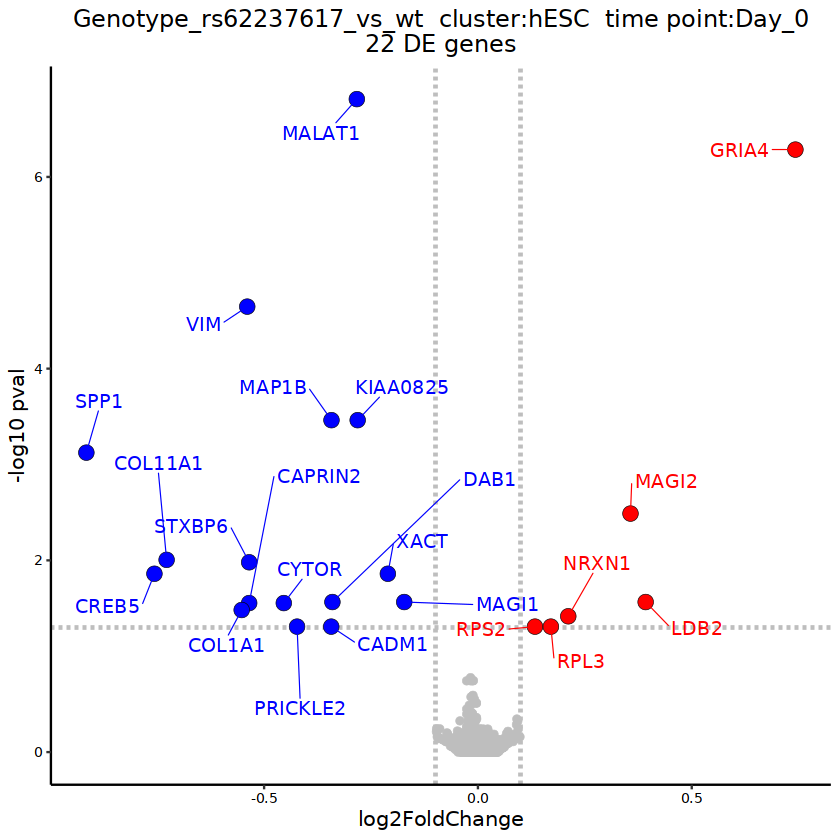

In [141]:
volcano_plot<-ggplot(data=REP,
                       aes(x=log2FoldChange,
                           y=minuslog10padj)) +
                geom_vline(xintercept=c(-0.1,0.1), color="gray", linetype='dashed',linewidth=1)+
                geom_hline(yintercept=c(1.3), color="gray", linetype='dashed',linewidth=1)+
 geom_point(data=REP[which(REP$minuslog10padj < 1.3 & REP$abslogfc < 0.1),],
               color="gray",fill="gray", stroke=0.2, shape=21, size=2)+
geom_point(data=REP[which(REP$minuslog10padj >= 1.3 & REP$log2FoldChange <= -0.1),],
               color="black",fill="blue", stroke=0.2, shape=21, size=4)+
geom_point(data=REP[which(REP$minuslog10padj >= 1.3 & REP$log2FoldChange >= 0.1),],
               color="black",fill="red", stroke=0.2, shape=21, size=4)+
scale_y_continuous(name="-log10 pval")+
theme_classic()+
ggtitle(paste(paste(paste(contrast_sel, sep=''), paste("cluster:",cell_type_sel, sep=''), paste("time point:",time_point_sel, sep= ''),sep='  '),paste(n_DE_genes, "DE genes", sep=" "), sep="\n"))+
    theme(plot.title=element_text(color="black", family="sans", size=14),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(color="black", family="sans", size=8))+
    theme(legend.title = element_text(family="sans"),
          legend.text = element_text(family="sans"),
          legend.key.size = unit(0.35, 'cm'), #change legend key size
          legend.key.height = unit(0.35, 'cm'), #change legend key height
          legend.key.width = unit(0.35, 'cm'), #change legend key width
          legend.position="hidden")+
    ggeasy::easy_center_title()

volcano_plot <-volcano_plot+
    geom_text_repel(data=REP[which(REP$minuslog10padj >= 1.3 & REP$log2FoldChange <= -0.1),],
                     aes(x=log2FoldChange,
                         y=minuslog10padj,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     color='blue',
                     segment.size  = 0.25,
                     segment.color = "blue",
                     force=25,
                     size=4,
                     box.padding = 1,
                     max.overlaps = Inf)

volcano_plot <-volcano_plot+
    geom_text_repel(data=REP[which(REP$minuslog10padj >= 1.3 & REP$log2FoldChange >= 0.1),],
                     aes(x=log2FoldChange,
                         y=minuslog10padj,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     color='red',
                     segment.size  = 0.25,
                     segment.color = "red",
                     force=25,
                     size=4,
                     box.padding = 1,
                     max.overlaps = Inf)


volcano_plot


In [142]:
setwd(path_graphs)

svgname<-paste(paste("volcano_plot",cell_type_sel, time_point_sel, contrast_sel, sep='_'),".svg",sep='')

ggsave(svgname,plot=volcano_plot, device ='svg', height=5, width=5)

## contrast Genotype_DNMT3A_vs_wt

In [143]:
contrast_sel<-'Genotype_DNMT3A_vs_wt'

In [144]:
REP<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$contrast == contrast_sel),]

str(REP)

'data.frame':	16558 obs. of  10 variables:
 $ gene          : chr  "BCL11B" "AL157944.1" "LINC00698" "NFIB" ...
 $ baseMean      : num  46.9 302.3 622.8 810.2 1480 ...
 $ log2FoldChange: num  -1.776 -0.532 -0.374 0.331 -0.319 ...
 $ lfcSE         : num  0.2409 0.111 0.0914 0.0797 0.0775 ...
 $ pvalue        : num  6.38e-15 5.32e-08 1.46e-06 1.29e-06 1.44e-06 ...
 $ padj          : num  1.06e-10 4.41e-04 4.84e-03 4.84e-03 4.84e-03 ...
 $ contrast      : chr  "Genotype_DNMT3A_vs_wt" "Genotype_DNMT3A_vs_wt" "Genotype_DNMT3A_vs_wt" "Genotype_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ minuslog10padj: num  9.98 3.36 2.32 2.32 2.32 ...
 $ abslogfc      : num  1.776 0.532 0.374 0.331 0.319 ...


In [145]:
other_selection<-c(REP$gene[which(REP$minuslog10padj >= 1.3 & REP$abslogfc >= 0.1)], other_selection)
str(other_selection)

n_DE_genes<-dim(REP[which(REP$minuslog10padj >= 1.3 & REP$abslogfc >= 0.1),])[1]

str(n_DE_genes)

 chr [1:28] "BCL11B" "AL157944.1" "LINC00698" "NFIB" "MGAT4C" "DDR2" ...
 int 6


## Volcano plot

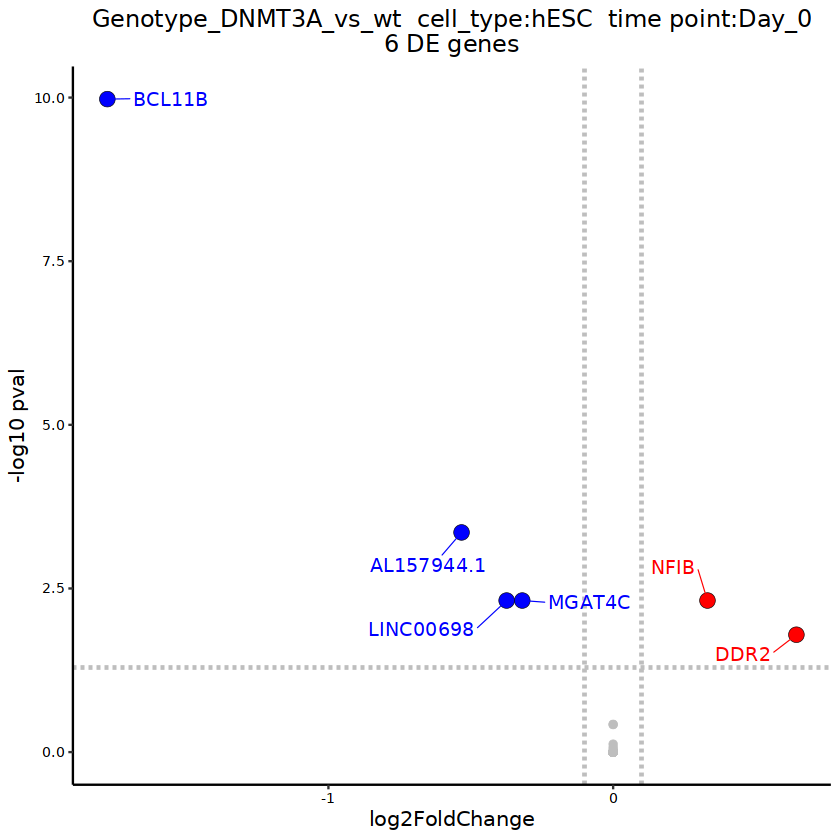

In [146]:
volcano_plot<-ggplot(data=REP,
                       aes(x=log2FoldChange,
                           y=minuslog10padj)) +
                geom_vline(xintercept=c(-0.1,0.1), color="gray", linetype='dashed',linewidth=1)+
                geom_hline(yintercept=c(1.3), color="gray", linetype='dashed',linewidth=1)+
 geom_point(data=REP[which(REP$minuslog10padj < 1.3 & REP$abslogfc < 0.1),],
               color="gray",fill="gray", stroke=0.2, shape=21, size=2)+
geom_point(data=REP[which(REP$minuslog10padj >= 1.3 & REP$log2FoldChange <= -0.1),],
               color="black",fill="blue", stroke=0.2, shape=21, size=4)+
geom_point(data=REP[which(REP$minuslog10padj >= 1.3 & REP$log2FoldChange >= 0.1),],
               color="black",fill="red", stroke=0.2, shape=21, size=4)+
scale_y_continuous(name="-log10 pval")+
theme_classic()+
ggtitle(paste(paste(paste(contrast_sel, sep=''), paste("cell_type:",cell_type_sel, sep=''), paste("time point:",time_point_sel, sep= ''),sep='  '),paste(n_DE_genes, "DE genes", sep=" "), sep="\n"))+
    theme(plot.title=element_text(color="black", family="sans", size=14),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(color="black", family="sans", size=8))+
    theme(legend.title = element_text(family="sans"),
          legend.text = element_text(family="sans"),
          legend.key.size = unit(0.35, 'cm'), #change legend key size
          legend.key.height = unit(0.35, 'cm'), #change legend key height
          legend.key.width = unit(0.35, 'cm'), #change legend key width
          legend.position="hidden")+
    ggeasy::easy_center_title()

volcano_plot <-volcano_plot+
    geom_text_repel(data=REP[which(REP$minuslog10padj >= 1.3 & REP$log2FoldChange <= -0.1),],
                     aes(x=log2FoldChange,
                         y=minuslog10padj,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     color='blue',
                     segment.size  = 0.25,
                     segment.color = "blue",
                     force=25,
                     size=4,
                     box.padding = 1,
                     max.overlaps = Inf)

volcano_plot <-volcano_plot+
    geom_text_repel(data=REP[which(REP$minuslog10padj >= 1.3 & REP$log2FoldChange >= 0.1),],
                     aes(x=log2FoldChange,
                         y=minuslog10padj,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     color='red',
                     segment.size  = 0.25,
                     segment.color = "red",
                     force=25,
                     size=4,
                     box.padding = 1,
                     max.overlaps = Inf)


volcano_plot


In [147]:
setwd(path_graphs)

svgname<-paste(paste("volcano_plot",cell_type_sel, time_point_sel, contrast_sel, sep='_'),".svg",sep='')

ggsave(svgname,plot=volcano_plot, device ='svg', height=5, width=5)

## contrast Genotype_rs62237617_DNMT3A_vs_wt

In [148]:
contrast_array

[1] "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_vs_wt"       
[3] "Genotype_DNMT3A_vs_wt"

In [149]:
contrast_sel<-'Genotype_rs62237617_DNMT3A_vs_wt'

In [150]:
REP<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$contrast == contrast_sel),]

str(REP)

'data.frame':	16558 obs. of  10 variables:
 $ gene          : chr  "BCL11B" "CALD1" "LSAMP" "COL1A1" ...
 $ baseMean      : num  46.9 3051.4 658.3 246 302.3 ...
 $ log2FoldChange: num  -2.857 0.506 0.788 1.057 -0.904 ...
 $ lfcSE         : num  0.274 0.0562 0.0906 0.1253 0.1086 ...
 $ pvalue        : num  1.09e-26 1.41e-20 2.03e-19 2.11e-18 3.32e-18 ...
 $ padj          : num  1.80e-22 1.16e-16 1.12e-15 8.75e-15 1.10e-14 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ minuslog10padj: num  21.7 15.9 15 14.1 14 ...
 $ abslogfc      : num  2.857 0.506 0.788 1.057 0.904 ...


In [151]:
n_DE_genes<-dim(REP[which(REP$minuslog10padj >= 1.3 & REP$abslogfc > 0.1),])[1]

n_DE_genes

[1] 447

In [152]:
str(other_selection)

 chr [1:28] "BCL11B" "AL157944.1" "LINC00698" "NFIB" "MGAT4C" "DDR2" ...


In [153]:
#REP[which(REP$gene%in%global_gene_categories_unique$gene & REP$minuslog10padj >= 1.3),]

## Volcano plot

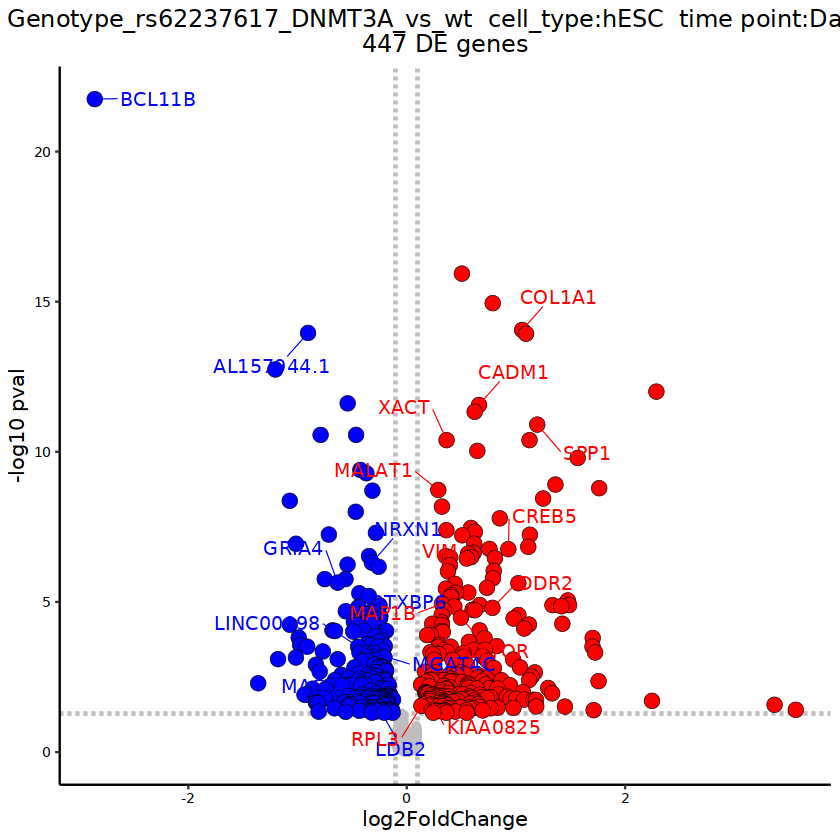

In [154]:
volcano_plot<-ggplot(data=REP,
                       aes(x=log2FoldChange,
                           y=minuslog10padj)) +
                geom_vline(xintercept=c(-0.1,0.1), color="gray", linetype='dashed',linewidth=1)+
                geom_hline(yintercept=c(1.3), color="gray", linetype='dashed',linewidth=1)+
 geom_point(data=REP[which(REP$minuslog10padj < 1.3 & REP$abslogfc < 0.1),],
               color="gray",fill="gray", stroke=0.2, shape=21, size=2)+
geom_point(data=REP[which(REP$minuslog10padj >= 1.3 & REP$log2FoldChange <= -0.1),],
               color="black",fill="blue", stroke=0.2, shape=21, size=4)+
geom_point(data=REP[which(REP$minuslog10padj >= 1.3 & REP$log2FoldChange >= 0.1),],
               color="black",fill="red", stroke=0.2, shape=21, size=4)+
scale_y_continuous(name="-log10 pval")+
theme_classic()+
ggtitle(paste(paste(paste(contrast_sel, sep=''), paste("cell_type:",cell_type_sel, sep=''), paste("time point:",time_point_sel, sep= ''),sep='  '),paste(n_DE_genes, "DE genes", sep=" "), sep="\n"))+
    theme(plot.title=element_text(color="black", family="sans", size=14),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(color="black", family="sans", size=8))+
    theme(legend.title = element_text(family="sans"),
          legend.text = element_text(family="sans"),
          legend.key.size = unit(0.35, 'cm'), #change legend key size
          legend.key.height = unit(0.35, 'cm'), #change legend key height
          legend.key.width = unit(0.35, 'cm'), #change legend key width
          legend.position="hidden")+
    ggeasy::easy_center_title()

volcano_plot <-volcano_plot+
    geom_text_repel(data=REP[which(REP$gene%in%c(other_selection) & REP$minuslog10padj >= 1.3 & REP$log2FoldChange <= -0.1),],
                     aes(x=log2FoldChange,
                         y=minuslog10padj,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     color='blue',
                     segment.size  = 0.25,
                     segment.color = "blue",
                     force=25,
                     size=4,
                     box.padding = 1,
                     max.overlaps = Inf)

volcano_plot <-volcano_plot+
    geom_text_repel(data=REP[which(REP$gene%in%c(other_selection) & REP$minuslog10padj >= 1.3 & REP$log2FoldChange >= 0.1),],
                     aes(x=log2FoldChange,
                         y=minuslog10padj,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     color='red',
                     segment.size  = 0.25,
                     segment.color = "red",
                     force=25,
                     size=4,
                     box.padding = 1,
                     max.overlaps = Inf)


volcano_plot


In [155]:
setwd(path_graphs)

svgname<-paste(paste("volcano_plot",cell_type_sel, time_point_sel, contrast_sel, sep='_'),".svg",sep='')

ggsave(svgname,plot=volcano_plot, device ='svg', height=5, width=5)

# Heatmaps NEW after GATA6 and BCL11A

## Read normalized counts

In [156]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

nor_counts.m<-read.table(file=paste("normalized_gene_counts_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", header=T)


str(nor_counts.m)

'data.frame':	198696 obs. of  5 variables:
 $ gene      : chr  "AL627309.1" "AL627309.5" "AL627309.4" "LINC01409" ...
 $ count     : num  3.59 13.8 1.66 49.94 29.8 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...


## Read GSEA enriched pathways

In [157]:
# global_gene_categories_unique<-read.table(file=paste("GSEA_enriched_pathways_cluster_",cluster_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", header =T)


In [158]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/GSEA_ORA_hESC_Day_0/GSEA/")

In [159]:
gene_annotations<-read.table(file=paste("genes_GSEA_annotated",".tsv", sep=''), sep="\t", header =T)
str(gene_annotations)

'data.frame':	274 obs. of  5 variables:
 $ gene         : chr  "ABTB2" "ACTB" "ACTG1" "ACTN1" ...
 $ cell_type    : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ diffexpressed: chr  "UP" "UP" "UP" "UP" ...
 $ TF_targets   : chr  "BCL11A|GATA6|PROX1" "BCL11A|MAZ" "BCL11A|MAZ" "MAZ|PROX1" ...
 $ other        : chr  "LAKE_ADULT_KIDNEY_C16_COLLECTING_SYSTEM_PRINCIPAL_CELLS_CORTEX|LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_STRE"| __truncated__ "GNATENKO_PLATELET_SIGNATURE|GOBP_PLATELET_ACTIVATION|GOBP_PLATELET_AGGREGATION|HP_ABNORMAL_PLATELET_VOLUME|HP_I"| __truncated__ "GOBP_PLATELET_ACTIVATION|GOBP_PLATELET_AGGREGATION|GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|"| __truncated__ "FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_ENDOTHELIAL|FAN_EMBRYONIC_CTX_BRAIN_ENDOTHELIAL_2|GOBP_PLATELET_ACTIVATION|G"| __truncated__ ...


In [160]:
gene_annotations_1_long<-unique(as.data.frame(cSplit(gene_annotations,sep = '|', direction = "long",
                                                                  splitCols = "other") , stringsAsFactors=F))

#colnames(gene_annotations_1_long)[which(colnames(gene_annotations_1_long) == 'geneID')]<-'gene'

cat("gene_annotations_1_long_0\n")
str(gene_annotations_1_long)
cat("\n")

Warning message in type.convert.default(unlist(x, use.names = FALSE)):
“'as.is' should be specified by the caller; using TRUE”


gene_annotations_1_long_0
'data.frame':	601 obs. of  5 variables:
 $ gene         : chr  "ABTB2" "ABTB2" "ACTB" "ACTB" ...
 $ cell_type    : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ diffexpressed: chr  "UP" "UP" "UP" "UP" ...
 $ TF_targets   : chr  "BCL11A|GATA6|PROX1" "BCL11A|GATA6|PROX1" "BCL11A|MAZ" "BCL11A|MAZ" ...
 $ other        : chr  "LAKE_ADULT_KIDNEY_C16_COLLECTING_SYSTEM_PRINCIPAL_CELLS_CORTEX" "LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_STRESSED_DISSOC_SUBSET" "GNATENKO_PLATELET_SIGNATURE" "GOBP_PLATELET_ACTIVATION" ...



In [161]:
indx.int<-grep("HEMATO", gene_annotations_1_long$other)

str(indx.int)

gene_annotations_1_long_sub<-gene_annotations_1_long[indx.int,]

str(gene_annotations_1_long_sub)
cat("\n")

gene_annotations_1_long_sub<-gene_annotations_1_long_sub[order(gene_annotations_1_long_sub$other),]

gene_annotations_1_long_sub.dt<-data.table(gene_annotations_1_long_sub, key=c('gene','cell_type'))


gene_class_1<-as.data.frame(gene_annotations_1_long_sub.dt[,.(string_ID=paste(unique(other), collapse="|")), by=key(gene_annotations_1_long_sub.dt)])


str(gene_class_1)
cat("\n")

summary(as.factor(gene_class_1$string_ID))
cat("\n")


 int [1:35] 10 76 78 82 90 149 166 184 199 229 ...
'data.frame':	35 obs. of  5 variables:
 $ gene         : chr  "ACTG1" "BCL11A" "BCL11B" "BCL11B" ...
 $ cell_type    : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ diffexpressed: chr  "UP" "DOWN" "DOWN" "DOWN" ...
 $ TF_targets   : chr  "BCL11A|MAZ" "GATA1" "ZHONG_PFC_C2_SOX5_BCL11B_POS_EXCITATORY_NEURON|ZHONG_PFC_C5_BCL11B_CALB2_POS_INP" "ZHONG_PFC_C2_SOX5_BCL11B_POS_EXCITATORY_NEURON|ZHONG_PFC_C5_BCL11B_CALB2_POS_INP" ...
 $ other        : chr  "GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN" "JAATINEN_HEMATOPOIETIC_STEM_CELL_UP" "GOBP_HEMATOPOIETIC_OR_LYMPHOID_ORGAN_DEVELOPMENT" "JAATINEN_HEMATOPOIETIC_STEM_CELL_DN" ...

'data.frame':	34 obs. of  3 variables:
 $ gene     : chr  "ACTG1" "BCL11A" "BCL11B" "CALN1" ...
 $ cell_type: chr  "hESC" "hESC" "hESC" "hESC" ...
 $ string_ID: chr  "GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN" "JAATINEN_HEMATOPOIETIC_STEM_CELL_UP" "GOBP_HEMATOPOIETIC_OR_LYMPHOID_ORGAN_DEVEL

GOBP_HEMATOPOIETIC_OR_LYMPHOID_ORGAN_DEVELOPMENT|JAATINEN_HEMATOPOIETIC_STEM_CELL_DN 
                                                                                   1 
                         GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN 
                                                                                   9 
                                                     IVANOVA_HEMATOPOIESIS_STEM_CELL 
                                                                                   8 
                                                 JAATINEN_HEMATOPOIETIC_STEM_CELL_UP 
                                                                                  16

In [162]:
gene_annotations_1_long<-unique(as.data.frame(cSplit(gene_annotations,sep = '|', direction = "long",
                                                                  splitCols = "other") , stringsAsFactors=F))

#colnames(gene_annotations_1_long)[which(colnames(gene_annotations_1_long) == 'geneID')]<-'gene'

cat("gene_annotations_1_long_0\n")
str(gene_annotations_1_long)
cat("\n")

Warning message in type.convert.default(unlist(x, use.names = FALSE)):
“'as.is' should be specified by the caller; using TRUE”


gene_annotations_1_long_0
'data.frame':	601 obs. of  5 variables:
 $ gene         : chr  "ABTB2" "ABTB2" "ACTB" "ACTB" ...
 $ cell_type    : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ diffexpressed: chr  "UP" "UP" "UP" "UP" ...
 $ TF_targets   : chr  "BCL11A|GATA6|PROX1" "BCL11A|GATA6|PROX1" "BCL11A|MAZ" "BCL11A|MAZ" ...
 $ other        : chr  "LAKE_ADULT_KIDNEY_C16_COLLECTING_SYSTEM_PRINCIPAL_CELLS_CORTEX" "LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_STRESSED_DISSOC_SUBSET" "GNATENKO_PLATELET_SIGNATURE" "GOBP_PLATELET_ACTIVATION" ...



##### Second part of the GSEA

In [163]:
gene_annotations_2_long<-unique(as.data.frame(cSplit(gene_annotations,sep = '|', direction = "long",
                                                                  splitCols = "TF_targets") , stringsAsFactors=F))

#colnames(gene_annotations_2_long)[which(colnames(gene_annotations_2_long) == 'geneID')]<-'gene'

cat("gene_annotations_2_long_0\n")
str(gene_annotations_2_long)
cat("\n")

Warning message in type.convert.default(unlist(x, use.names = FALSE)):
“'as.is' should be specified by the caller; using TRUE”


gene_annotations_2_long_0
'data.frame':	375 obs. of  5 variables:
 $ gene         : chr  "ABTB2" "ABTB2" "ABTB2" "ACTB" ...
 $ cell_type    : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ diffexpressed: chr  "UP" "UP" "UP" "UP" ...
 $ TF_targets   : chr  "BCL11A" "GATA6" "PROX1" "BCL11A" ...
 $ other        : chr  "LAKE_ADULT_KIDNEY_C16_COLLECTING_SYSTEM_PRINCIPAL_CELLS_CORTEX|LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_STRE"| __truncated__ "LAKE_ADULT_KIDNEY_C16_COLLECTING_SYSTEM_PRINCIPAL_CELLS_CORTEX|LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_STRE"| __truncated__ "LAKE_ADULT_KIDNEY_C16_COLLECTING_SYSTEM_PRINCIPAL_CELLS_CORTEX|LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_STRE"| __truncated__ "GNATENKO_PLATELET_SIGNATURE|GOBP_PLATELET_ACTIVATION|GOBP_PLATELET_AGGREGATION|HP_ABNORMAL_PLATELET_VOLUME|HP_I"| __truncated__ ...



In [164]:
indx.int<-grep("BCL11A|GATA6|PROX1", gene_annotations_2_long$TF_targets)

str(indx.int)

gene_annotations_2_long_sub<-gene_annotations_2_long[indx.int,]

str(gene_annotations_2_long_sub)
cat("\n")

indx.dep<-grep("GATA6_01|PETROVA_PROX1_TARGETS_DN", gene_annotations_2_long_sub$TF_targets)


gene_annotations_2_long_sub<-gene_annotations_2_long_sub[-indx.dep,]

str(gene_annotations_2_long_sub)
cat("\n")

gene_annotations_2_long_sub<-gene_annotations_2_long_sub[order(gene_annotations_2_long_sub$TF_targets),]

gene_annotations_2_long_sub.dt<-data.table(gene_annotations_2_long_sub, key=c('gene','cell_type'))


gene_class_2<-as.data.frame(gene_annotations_2_long_sub.dt[,.(string_ID=paste(unique(TF_targets), collapse="|")), by=key(gene_annotations_2_long_sub.dt)])


str(gene_class_2)
cat("\n")

summary(as.factor(gene_class_2$string_ID))
cat("\n")


 int [1:136] 1 2 3 4 6 9 13 19 21 22 ...
'data.frame':	136 obs. of  5 variables:
 $ gene         : chr  "ABTB2" "ABTB2" "ABTB2" "ACTB" ...
 $ cell_type    : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ diffexpressed: chr  "UP" "UP" "UP" "UP" ...
 $ TF_targets   : chr  "BCL11A" "GATA6" "PROX1" "BCL11A" ...
 $ other        : chr  "LAKE_ADULT_KIDNEY_C16_COLLECTING_SYSTEM_PRINCIPAL_CELLS_CORTEX|LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_STRE"| __truncated__ "LAKE_ADULT_KIDNEY_C16_COLLECTING_SYSTEM_PRINCIPAL_CELLS_CORTEX|LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_STRE"| __truncated__ "LAKE_ADULT_KIDNEY_C16_COLLECTING_SYSTEM_PRINCIPAL_CELLS_CORTEX|LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_STRE"| __truncated__ "GNATENKO_PLATELET_SIGNATURE|GOBP_PLATELET_ACTIVATION|GOBP_PLATELET_AGGREGATION|HP_ABNORMAL_PLATELET_VOLUME|HP_I"| __truncated__ ...

'data.frame':	106 obs. of  5 variables:
 $ gene         : chr  "ABTB2" "ABTB2" "ABTB2" "ACTB" ...
 $ cell_type    : chr  "hESC" "hESC" "hESC" "hESC" ...
 

BCL11A       BCL11A|GATA6 BCL11A|GATA6|PROX1       BCL11A|PROX1 
                12                  3                  6                  4 
             GATA6        GATA6|PROX1              PROX1 
                33                  7                 13

### combine in a unique object

In [165]:
PRE<-rbind(gene_class_1,gene_class_2)

cat(str(PRE))
cat("\n")

'data.frame':	112 obs. of  3 variables:
 $ gene     : chr  "ACTG1" "BCL11A" "BCL11B" "CALN1" ...
 $ cell_type: chr  "hESC" "hESC" "hESC" "hESC" ...
 $ string_ID: chr  "GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN" "JAATINEN_HEMATOPOIETIC_STEM_CELL_UP" "GOBP_HEMATOPOIETIC_OR_LYMPHOID_ORGAN_DEVELOPMENT|JAATINEN_HEMATOPOIETIC_STEM_CELL_DN" "JAATINEN_HEMATOPOIETIC_STEM_CELL_UP" ...



In [166]:
PRE.dt<-data.table(PRE, key=c('gene','cell_type'))


global_gene_categories_unique<-as.data.frame(PRE.dt[,.(string_ID=paste(unique(string_ID), collapse="|")), by=key(PRE.dt)])


str(global_gene_categories_unique)
cat("\n")
str(unique(global_gene_categories_unique$gene))
cat("\n")

summary(as.factor(global_gene_categories_unique$string_ID))
cat("\n")


length(names(summary(as.factor(global_gene_categories_unique$string_ID))))
cat("\n")

'data.frame':	106 obs. of  3 variables:
 $ gene     : chr  "ABTB2" "ACTB" "ACTG1" "ACTN1" ...
 $ cell_type: chr  "hESC" "hESC" "hESC" "hESC" ...
 $ string_ID: chr  "BCL11A|GATA6|PROX1" "BCL11A" "GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A" "PROX1" ...

 chr [1:106] "ABTB2" "ACTB" "ACTG1" "ACTN1" "ADGRV1" "AHNAK" "ANKRD33B" ...



BCL11A 
                                                                                  10 
                                                                        BCL11A|GATA6 
                                                                                   2 
                                                                  BCL11A|GATA6|PROX1 
                                                                                   6 
                                                                        BCL11A|PROX1 
                                                                                   3 
                                                                               GATA6 
                                                                                  31 
                                                                         GATA6|PROX1 
                                                                                   7 
GOBP_HEMATOPOIETIC_OR_LYMPHOID_ORGAN_DEVELOPMENT|JAATINEN_HEMATOPOIETIC_STEM_CELL_DN 
                                                                                   1 
                         GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN 
                                                                                   5 
                  GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A 
                                                                                   2 
            GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A|GATA6 
                                                                                   1 
            GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A|PROX1 
                                                                                   1 
                                                     IVANOVA_HEMATOPOIESIS_STEM_CELL 
                                                                                   8 
                                                 JAATINEN_HEMATOPOIETIC_STEM_CELL_UP 
                                                                                  14 
                                           JAATINEN_HEMATOPOIETIC_STEM_CELL_UP|GATA6 
                                                                                   2 
                                                                               PROX1 
                                                                                  13

[1] 15

## Annotation of rows

In [168]:
annotation_row = data.frame(GeneClass = global_gene_categories_unique$string_ID)

rownames(annotation_row) = global_gene_categories_unique$gene


cat("annotation_row_0\n")
cat(str(annotation_row))
cat("\n")
cat(sprintf(as.character(names(summary(as.factor(annotation_row$GeneClass))))))
cat("\n")
cat(sprintf(as.character(summary(as.factor(annotation_row$GeneClass)))))
cat("\n")

annotation_row_0
'data.frame':	106 obs. of  1 variable:
 $ GeneClass: chr  "BCL11A|GATA6|PROX1" "BCL11A" "GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A" "PROX1" ...

BCL11A BCL11A|GATA6 BCL11A|GATA6|PROX1 BCL11A|PROX1 GATA6 GATA6|PROX1 GOBP_HEMATOPOIETIC_OR_LYMPHOID_ORGAN_DEVELOPMENT|JAATINEN_HEMATOPOIETIC_STEM_CELL_DN GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A|GATA6 GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A|PROX1 IVANOVA_HEMATOPOIESIS_STEM_CELL JAATINEN_HEMATOPOIETIC_STEM_CELL_UP JAATINEN_HEMATOPOIETIC_STEM_CELL_UP|GATA6 PROX1
10 2 6 3 31 7 1 5 2 1 1 8 14 2 13


## Selection of genes

In [169]:
REP<-nor_counts.m[which(nor_counts.m$gene%in%row.names(annotation_row)),]

str(REP)

'data.frame':	1272 obs. of  5 variables:
 $ gene      : chr  "NASP" "S100A10" "LMNA" "PBX1" ...
 $ count     : num  2225 404 177 2647 142 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...


In [170]:
REP_wide<-as.data.frame(pivot_wider(REP, id_cols=c('gene','time_point'), 
                                    names_from=c('cell_type',"clone_line"), 
                                    values_from='count',
                                    names_sep='|'), stringsAsFactors=F)

str(REP_wide)

'data.frame':	106 obs. of  14 variables:
 $ gene                    : chr  "NASP" "S100A10" "LMNA" "PBX1" ...
 $ time_point              : chr  "Day_0" "Day_0" "Day_0" "Day_0" ...
 $ hESC|DNMT3A_1           : num  2225 404 177 2647 142 ...
 $ hESC|DNMT3A_2           : num  2197 352 158 2853 138 ...
 $ hESC|DNMT3A_3           : num  2134 411 186 2649 132 ...
 $ hESC|rs62237617_1       : num  2286 311 105 2861 113 ...
 $ hESC|rs62237617_2       : num  2410 317 174 2957 138 ...
 $ hESC|rs62237617_3       : num  2339 330 146 2847 114 ...
 $ hESC|rs62237617_DNMT3A_1: num  1891.2 521.9 271.4 2280.4 96.9 ...
 $ hESC|rs62237617_DNMT3A_2: num  2001 482 231 2384 100 ...
 $ hESC|rs62237617_DNMT3A_3: num  1938.8 476.4 236.1 2296.3 95.6 ...
 $ hESC|wt_1               : num  2198 380 174 2772 112 ...
 $ hESC|wt_2               : num  2216 372 147 2965 143 ...
 $ hESC|wt_3               : num  2189 404 172 2758 192 ...


In [171]:
GeneEXP_matrix<-as.matrix(REP_wide[,-which(colnames(REP_wide)%in%c('gene','time_point'))])

row.names(GeneEXP_matrix)<-REP_wide$gene

str(GeneEXP_matrix)

 num [1:106, 1:12] 2225 404 177 2647 142 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:106] "NASP" "S100A10" "LMNA" "PBX1" ...
  ..$ : chr [1:12] "hESC|DNMT3A_1" "hESC|DNMT3A_2" "hESC|DNMT3A_3" "hESC|rs62237617_1" ...


## Annotation of columns

In [172]:
  
  annotation_col<- data.frame(matrix(vector(), length(colnames(GeneEXP_matrix)), 2,
                                     dimnames=list(c(),
                                                   c("cell_type","clone_line"))),stringsAsFactors=F)
  
  row.names(annotation_col)<-colnames(GeneEXP_matrix)
  
  
  cat("annotation_col_0\n")
  cat(str(annotation_col))
  cat("\n")
  #cat(sprintf(as.character(row.names(annotation_col))))
  #cat("\n")

annotation_col$cell_type<-gsub("\\|.+$","", row.names(annotation_col))
annotation_col$clone_line<-gsub("^[^\\|]+\\|","", row.names(annotation_col))

 cat("annotation_col_1\n")
  cat(str(annotation_col))
  cat("\n")

annotation_col$Genotype<-NA
  
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('wt_1','wt_2','wt_3'))]<-'wt'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('rs62237617_1','rs62237617_2','rs62237617_3'))]<-'rs62237617'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('DNMT3A_1','DNMT3A_2','DNMT3A_3'))]<-'DNMT3A'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('rs62237617_DNMT3A_1','rs62237617_DNMT3A_2','rs62237617_DNMT3A_3'))]<-'rs62237617_DNMT3A'


cat("annotation_col_PRE\n")
  cat(str(annotation_col))
  cat("\n")
names(summary(as.factor(annotation_col$Genotype)))
  cat("\n")
names(summary(as.factor(annotation_col$clone_line)))
  cat("\n")
names(summary(as.factor(annotation_col$cell_type)))
  cat("\n")

annotation_col$Genotype<-factor(annotation_col$Genotype,
                                                    levels=levels(adata@meta.data$Genotype),
                                                    ordered=T)

annotation_col$clone_line<-droplevels(factor(annotation_col$clone_line,
                                                    levels=levels(adata@meta.data$clone_line),
                                                    ordered=T))

annotation_col$cell_type<-droplevels(factor(annotation_col$cell_type,
                                                    levels=levels(adata@meta.data$refined_annotation_majority_vote),
                                                    ordered=T))

cat("annotation_col_POST\n")
  cat(str(annotation_col))
  cat("\n")
names(summary(as.factor(annotation_col$Genotype)))
  cat("\n")
names(summary(as.factor(annotation_col$clone_line)))
  cat("\n")
names(summary(as.factor(annotation_col$cell_type)))
  cat("\n")

annotation_col_0
'data.frame':	12 obs. of  2 variables:
 $ cell_type : logi  NA NA NA NA NA NA ...
 $ clone_line: logi  NA NA NA NA NA NA ...

annotation_col_1
'data.frame':	12 obs. of  2 variables:
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_2" "DNMT3A_3" "rs62237617_1" ...

annotation_col_PRE
'data.frame':	12 obs. of  3 variables:
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_2" "DNMT3A_3" "rs62237617_1" ...
 $ Genotype  : chr  "DNMT3A" "DNMT3A" "DNMT3A" "rs62237617" ...



[1] "DNMT3A"            "rs62237617"        "rs62237617_DNMT3A"
[4] "wt"

[1] "DNMT3A_1"            "DNMT3A_2"            "DNMT3A_3"           
 [4] "rs62237617_1"        "rs62237617_2"        "rs62237617_3"       
 [7] "rs62237617_DNMT3A_1" "rs62237617_DNMT3A_2" "rs62237617_DNMT3A_3"
[10] "wt_1"                "wt_2"                "wt_3"

[1] "hESC"


annotation_col_POST
'data.frame':	12 obs. of  3 variables:
 $ cell_type : Ord.factor w/ 1 level "hESC": 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 4 4 4 1 ...



[1] "wt"                "rs62237617"        "DNMT3A"           
[4] "rs62237617_DNMT3A"

[1] "wt_1"                "wt_2"                "wt_3"               
 [4] "rs62237617_1"        "rs62237617_2"        "rs62237617_3"       
 [7] "DNMT3A_1"            "DNMT3A_2"            "DNMT3A_3"           
[10] "rs62237617_DNMT3A_1" "rs62237617_DNMT3A_2" "rs62237617_DNMT3A_3"

[1] "hESC"

## Annotation of colors

In [173]:
names(summary(as.factor(annotation_row$GeneClass)))

[1] "BCL11A"                                                                              
 [2] "BCL11A|GATA6"                                                                        
 [3] "BCL11A|GATA6|PROX1"                                                                  
 [4] "BCL11A|PROX1"                                                                        
 [5] "GATA6"                                                                               
 [6] "GATA6|PROX1"                                                                         
 [7] "GOBP_HEMATOPOIETIC_OR_LYMPHOID_ORGAN_DEVELOPMENT|JAATINEN_HEMATOPOIETIC_STEM_CELL_DN"
 [8] "GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN"                         
 [9] "GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A"                  
[10] "GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A|GATA6"            
[11] "GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A|PROX1"            
[12] "IVANOVA_HEMATOPOIESIS_STEM_CELL"                                                     
[13] "JAATINEN_HEMATOPOIETIC_STEM_CELL_UP"                                                 
[14] "JAATINEN_HEMATOPOIETIC_STEM_CELL_UP|GATA6"                                           
[15] "PROX1"

In [175]:
 
ann_colors <- list( clone_line = c('wt_1' = brewer.pal(9, "Greens")[c(5)],
                                  'wt_2' = brewer.pal(9, "Greens")[c(6)],
                                  'wt_3' = brewer.pal(9, "Greens")[c(7)],
                                   'rs62237617_1' = brewer.pal(9, "Reds")[c(5)],
                                    'rs62237617_2' = brewer.pal(9, "Reds")[c(6)],
                                   'rs62237617_3' = brewer.pal(9, "Reds")[c(7)],
                                   'DNMT3A_1' = brewer.pal(9, "Purples")[c(5)],
                                   'DNMT3A_2' = brewer.pal(9, "Purples")[c(6)],
                                   'DNMT3A_3' = brewer.pal(9, "Purples")[c(7)],
                                   'rs62237617_DNMT3A_1' = brewer.pal(9, "Blues")[c(3)],
                                    'rs62237617_DNMT3A_2' = brewer.pal(9, "Blues")[c(4)],
                                   'rs62237617_DNMT3A_3' = brewer.pal(9, "Blues")[c(5)]),
                   Genotype = c('wt' = brewer.pal(9, "Greens")[c(5)],
                                                    'rs62237617' = brewer.pal(9, "Reds")[c(5)],
                                                    'DNMT3A' = brewer.pal(9, "Purples")[c(5)],
                                                    'rs62237617_DNMT3A' = brewer.pal(9, "Blues")[c(3)]),
                   cluster = c('1' = brewer.pal(6, "Dark2")[c(1)],
                                 '2' = brewer.pal(6, "Dark2")[c(2)],
                                   '3' = brewer.pal(6, "Dark2")[c(3)],
                                    '4' = brewer.pal(6, "Dark2")[c(4)],
                                    '5' = brewer.pal(6, "Dark2")[c(5)],
                                    '6' = brewer.pal(6, "Dark2")[c(6)]),                  
                  GeneClass = c('BCL11A' = brewer.pal(8, "Dark2")[c(1)], 
                                'BCL11A|GATA6' = brewer.pal(8, "Dark2")[c(2)], 
                                'BCL11A|GATA6|PROX1' = brewer.pal(8, "Dark2")[c(3)], 
                                'BCL11A|PROX1' = brewer.pal(8, "Dark2")[c(4)], 
                                'GATA6' = brewer.pal(8, "Dark2")[c(5)], 
                                'GATA6|PROX1' = brewer.pal(8, "Dark2")[c(6)], 
                                'PROX1' = brewer.pal(8, "Dark2")[c(7)], 
                                'GOBP_HEMATOPOIETIC_OR_LYMPHOID_ORGAN_DEVELOPMENT|JAATINEN_HEMATOPOIETIC_STEM_CELL_DN' = brewer.pal(8, "Pastel1")[c(1)], 
                                'GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN' = brewer.pal(8, "Pastel1")[c(2)], 
                                'GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A' = brewer.pal(8, "Pastel1")[c(3)], 
                                'GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A|GATA6' = brewer.pal(8, "Pastel1")[c(4)], 
                                'GSE37301_HEMATOPOIETIC_STEM_CELL_VS_GRAN_MONO_PROGENITOR_DN|BCL11A|PROX1' = brewer.pal(8, "Pastel1")[c(5)], 
                                'IVANOVA_HEMATOPOIESIS_STEM_CELL' = brewer.pal(8, "Pastel1")[c(6)], 
                                'JAATINEN_HEMATOPOIETIC_STEM_CELL_UP' = brewer.pal(8, "Pastel1")[c(7)], 
                                'JAATINEN_HEMATOPOIETIC_STEM_CELL_UP|GATA6' = brewer.pal(8, "Pastel1")[c(8)])                
                  )


str(ann_colors)

List of 4
 $ clone_line: Named chr [1:12] "#74C476" "#41AB5D" "#238B45" "#FB6A4A" ...
  ..- attr(*, "names")= chr [1:12] "wt_1" "wt_2" "wt_3" "rs62237617_1" ...
 $ Genotype  : Named chr [1:4] "#74C476" "#FB6A4A" "#9E9AC8" "#C6DBEF"
  ..- attr(*, "names")= chr [1:4] "wt" "rs62237617" "DNMT3A" "rs62237617_DNMT3A"
 $ cluster   : Named chr [1:6] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" ...
  ..- attr(*, "names")= chr [1:6] "1" "2" "3" "4" ...
 $ GeneClass : Named chr [1:15] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" ...
  ..- attr(*, "names")= chr [1:15] "BCL11A" "BCL11A|GATA6" "BCL11A|GATA6|PROX1" "BCL11A|PROX1" ...


## graph

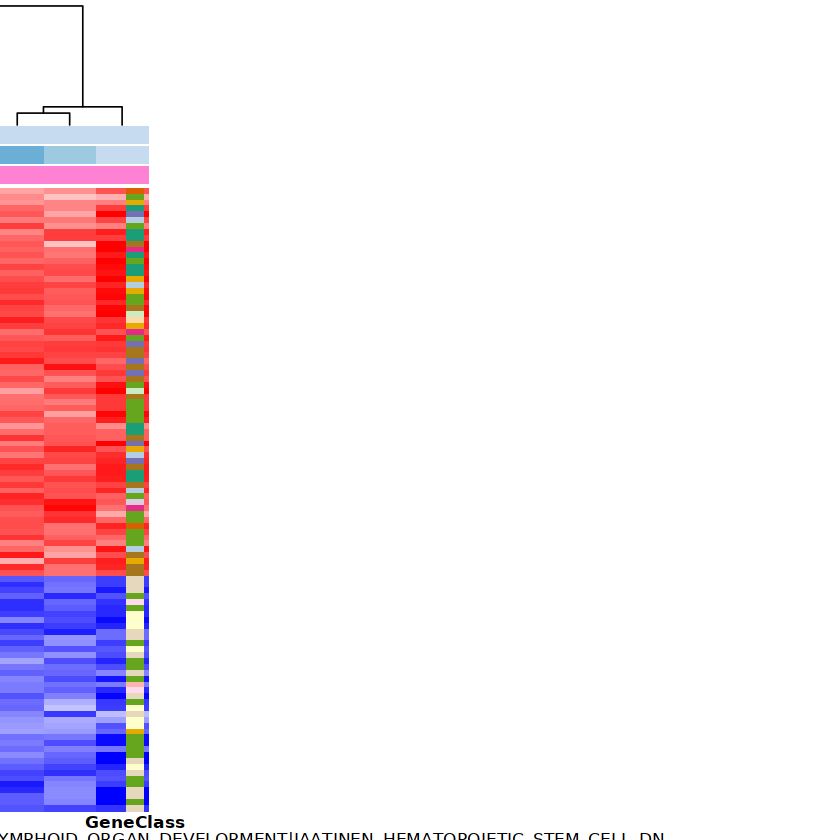

In [180]:
heatmap<-pheatmap(GeneEXP_matrix, display_numbers = FALSE, number_format = "%.1e",
                    show_colnames=FALSE,
                    angle_col = "0",
                    clustering_method="ward.D2",
                    fontsize_row = 8, 
                    fontsize_col = 8,
                    breaks=seq(-2,2,length.out=101),
                    color=colorRampPalette(c("blue","white","red"))(100),
                    scale="row",
                    cluster_cols=TRUE,
                    border_color='black',
                    treeheight_row=70, treeheight_col=70, cutree_cols=7,
                  annotation_col = annotation_col,
                  annotation_row = annotation_row,
                  annotation_colors = ann_colors)

In [181]:
setwd(path_graphs)


svgname<-paste(paste("Heatmap_after_GATA6_and_BCL11A",cell_type_sel, time_point_sel, sep='_'),".svg",sep='')


ggsave(svgname,plot=heatmap, device ='svg', height =13, width =13)


In [187]:
#str(heatmap)

# Dotplot of the different comparisons

In [188]:
selected_genes_after_heatmap_clustering<-heatmap$tree_row$labels[heatmap$tree_row$order]
str(selected_genes_after_heatmap_clustering)

 chr [1:106] "EML1" "ZFPM2" "PLEKHG3" "PDE8A" "TMSB4X" "TMTC2" "LAMA5" ...


In [189]:
str(Results_per_comparison_within_cell_type)

'data.frame':	49674 obs. of  10 variables:
 $ gene          : chr  "BCL11B" "CALD1" "LSAMP" "COL1A1" ...
 $ baseMean      : num  46.9 3051.4 658.3 246 302.3 ...
 $ log2FoldChange: num  -2.857 0.506 0.788 1.057 -0.904 ...
 $ lfcSE         : num  0.274 0.0562 0.0906 0.1253 0.1086 ...
 $ pvalue        : num  1.09e-26 1.41e-20 2.03e-19 2.11e-18 3.32e-18 ...
 $ padj          : num  1.80e-22 1.16e-16 1.12e-15 8.75e-15 1.10e-14 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ minuslog10padj: num  21.7 15.9 15 14.1 14 ...
 $ abslogfc      : num  2.857 0.506 0.788 1.057 0.904 ...


### Prepare the DE dataframe

In [190]:
Results_per_comparison_within_cell_type_sel<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$gene%in%selected_genes_after_heatmap_clustering),]

str(Results_per_comparison_within_cell_type_sel)
cat("\n")

Results_per_comparison_within_cell_type_sel$gene<-factor(Results_per_comparison_within_cell_type_sel$gene, levels=rev(selected_genes_after_heatmap_clustering), ordered=T)

str(Results_per_comparison_within_cell_type_sel)
cat("\n")

names(summary(as.factor(Results_per_comparison_within_cell_type_sel$contrast)))
cat("\n")

Results_per_comparison_within_cell_type_sel$contrast<-factor(Results_per_comparison_within_cell_type_sel$contrast, levels=c('Genotype_rs62237617_vs_wt','Genotype_DNMT3A_vs_wt','Genotype_rs62237617_DNMT3A_vs_wt'), ordered=T)

str(Results_per_comparison_within_cell_type_sel)
cat("\n")

Results_per_comparison_within_cell_type_sel$SIG<-NA

Results_per_comparison_within_cell_type_sel$SIG[which(Results_per_comparison_within_cell_type_sel$minuslog10padj >= 1.3)]<-'YES'
Results_per_comparison_within_cell_type_sel$SIG[which(Results_per_comparison_within_cell_type_sel$minuslog10padj < 1.3)]<-'NO'


Results_per_comparison_within_cell_type_sel$SIG<-factor(Results_per_comparison_within_cell_type_sel$SIG, levels=c('NO','YES'), ordered=T)

str(Results_per_comparison_within_cell_type_sel)
cat("\n")



'data.frame':	318 obs. of  10 variables:
 $ gene          : chr  "BCL11B" "CADM1" "ITGAV" "ANXA1" ...
 $ baseMean      : num  46.9 616.8 438 100.2 139.4 ...
 $ log2FoldChange: num  -2.857 0.662 0.647 1.566 1.249 ...
 $ lfcSE         : num  0.274 0.0872 0.0912 0.2236 0.1936 ...
 $ pvalue        : num  1.09e-26 1.66e-15 9.56e-14 1.74e-13 5.42e-12 ...
 $ padj          : num  1.80e-22 2.75e-12 9.31e-11 1.60e-10 3.59e-09 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ minuslog10padj: num  21.75 11.56 10.03 9.79 8.45 ...
 $ abslogfc      : num  2.857 0.662 0.647 1.566 1.249 ...

'data.frame':	318 obs. of  10 variables:
 $ gene          : Ord.factor w/ 106 levels "SCD"<"UBR5"<"DAPK1"<..: 22 79 90 86 67 84 41 80 92 35 ...
 $ baseMean      : num  46.9 616.8 438 100.2 139.4 ...
 $ log2FoldChange: num  -2.857 0.662 0

[1] "Genotype_DNMT3A_vs_wt"            "Genotype_rs62237617_DNMT3A_vs_wt"
[3] "Genotype_rs62237617_vs_wt"


'data.frame':	318 obs. of  10 variables:
 $ gene          : Ord.factor w/ 106 levels "SCD"<"UBR5"<"DAPK1"<..: 22 79 90 86 67 84 41 80 92 35 ...
 $ baseMean      : num  46.9 616.8 438 100.2 139.4 ...
 $ log2FoldChange: num  -2.857 0.662 0.647 1.566 1.249 ...
 $ lfcSE         : num  0.274 0.0872 0.0912 0.2236 0.1936 ...
 $ pvalue        : num  1.09e-26 1.66e-15 9.56e-14 1.74e-13 5.42e-12 ...
 $ padj          : num  1.80e-22 2.75e-12 9.31e-11 1.60e-10 3.59e-09 ...
 $ contrast      : Ord.factor w/ 3 levels "Genotype_rs62237617_vs_wt"<..: 3 3 3 3 3 3 3 3 3 3 ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ minuslog10padj: num  21.75 11.56 10.03 9.79 8.45 ...
 $ abslogfc      : num  2.857 0.662 0.647 1.566 1.249 ...

'data.frame':	318 obs. of  11 variables:
 $ gene          : Ord.factor w/ 106 levels "SCD"<"UBR5"<"DAPK1"<..: 22 79 90 86 67 84 41 80 92 35 ...
 $ baseMean      : num  46.9 616.8 438 100.2 139.4 ...
 $ log2FoldChange: num  -2.857 0.662 0.647 1.566 1.249 ...
 $ lfc

## graph

In [191]:
vector_fill<-c(brewer.pal(9, "Reds")[5],brewer.pal(9, "Purples")[5],brewer.pal(9, "Blues")[3])

str(vector_fill)

 chr [1:3] "#FB6A4A" "#9E9AC8" "#C6DBEF"


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


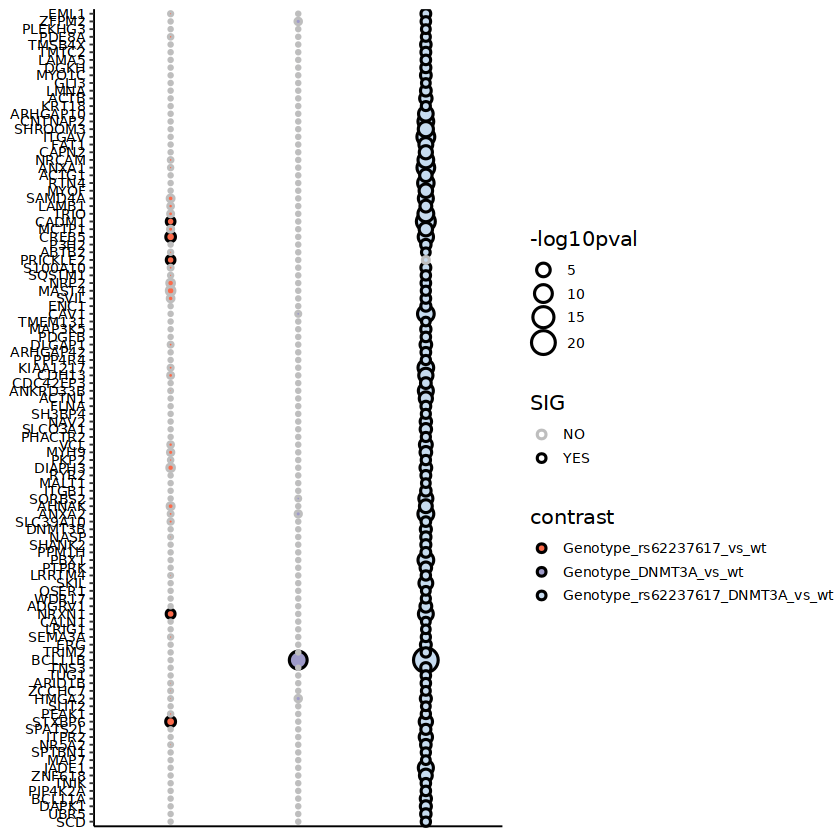

In [192]:
 logpval_dotplot<-ggplot(data=Results_per_comparison_within_cell_type_sel,
                           aes(y=gene,
                               x=contrast))+
    geom_point(aes(size=minuslog10padj, 
                   color=SIG,
                   fill=contrast),
               stroke=1, shape=21)+
    scale_size(range = c(0,6), name='-log10pval')+
    scale_y_discrete(name=NULL)+
    scale_x_discrete(name=NULL)+
    scale_fill_manual(values=vector_fill, drop=F)+
    scale_color_manual(values=c('gray','black'))+
    theme_classic()+
    theme(axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(size=8, color="black", family="sans"),
          axis.text.x=element_blank(),
          axis.line.x = element_line(size = 0.4),
          axis.ticks.x = element_blank(),
          axis.ticks.y = element_line(size = 0.4),
          axis.line.y = element_line(size = 0.4))+
    theme(legend.title = element_text(size=12),
          legend.text = element_text(size=8),
          legend.key.size = unit(0.5, 'cm'), #change legend key size
          legend.key.height = unit(0.5, 'cm'), #change legend key height
          legend.key.width = unit(0.5, 'cm'), #change legend key width
          legend.position="right")+
    ggeasy::easy_center_title()

logpval_dotplot

In [193]:
setwd(path_graphs)


svgname<-paste(paste("logpval_dotplot_after_GATA6_and_BCL11A",cell_type_sel, time_point_sel, sep='_'),".svg",sep='')


ggsave(svgname,plot=logpval_dotplot, device ='svg', height =10, width =5)

# Cell count plot

### Define cell_type_sel and time_point_sel

In [194]:
cell_type_sel<-'hESC'

time_point_sel<-'Day_0'


### Subset the metadata list

In [195]:
metadata_df<-metadata_ls[[cell_type_sel]]

str(metadata_df)

'data.frame':	13 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 1 98 2277 130 119 242 506 600 715 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 2 2 2 4 4 4 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 8 9 4 5 6 10 11 12 ...
 $ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 1 1 1 1 1 1 1 1 ...


In [196]:
metadata_df_time_point<-droplevels(metadata_df[which(metadata_df$time_point == time_point_sel),])
metadata_df_time_point<-metadata_df_time_point[order(metadata_df_time_point$clone_line),]

str(metadata_df_time_point)
cat("\n")

'data.frame':	12 obs. of  7 variables:
 $ sample_id                                 : chr  "wt_1_Day_0" "wt_2_Day_0" "wt_3_Day_0" "rs62237617_1_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "wt_1_Day_0_clusterhESC" "wt_2_Day_0_clusterhESC" "wt_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  60 132 80 130 119 242 893 98 2277 506 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 1 1 1 2 2 2 3 3 3 4 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_0": 1 1 1 1 1 1 1 1 1 1 ...



## Barplot of cell counts

In [197]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

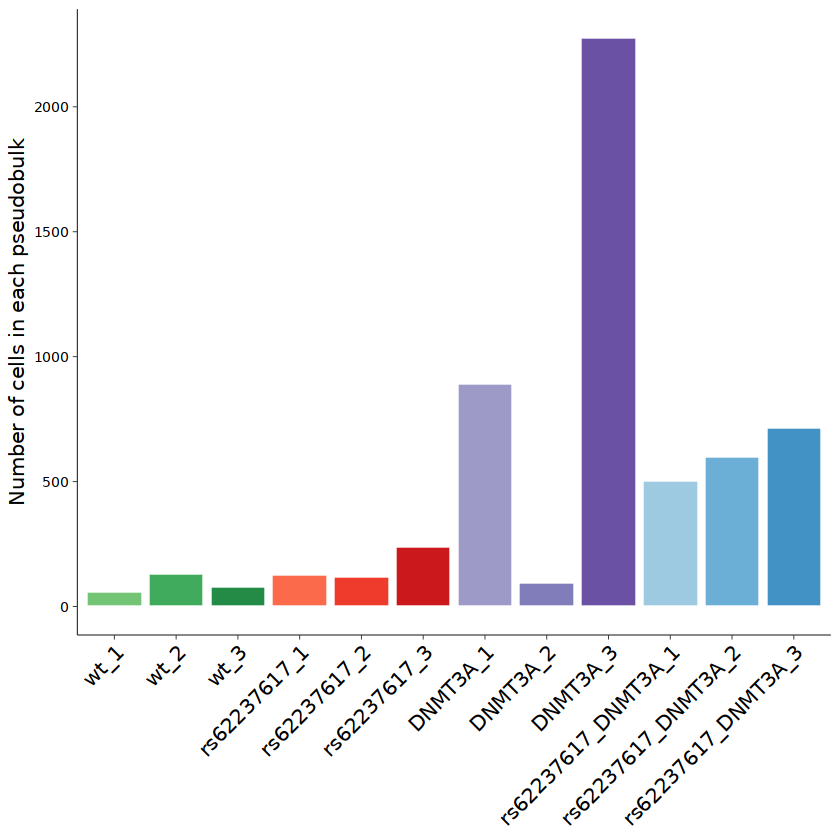

In [198]:
  barplot<-ggplot(data=metadata_df_time_point,
           aes(x=clone_line, y=cell_count,
               fill=clone_line)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Number of cells in each pseudobulk",sep=" "))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="GFPbc")+
     theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=8, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=12,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="hidden")

 barplot

In [199]:
setwd(path_graphs)


svgname<-paste(paste("Barplot_cell_counts",cell_type_sel, time_point_sel, sep='_'),".svg",sep='')


ggsave(svgname,plot=barplot, device ='svg', height =4, width =4)
